## Heat Island

### Night Time

Text(0.5, 1.0, 'Heat Island Effect for Average Minimum Monthly Temperature')

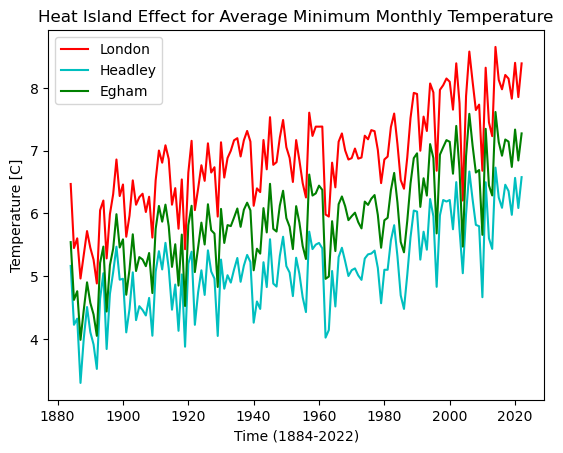

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True, autoclose=True)

tas = np.array(data['tasmin'])
time = np.array(data['time'])

x = np.array(data['projection_x_coordinate'])
y = np.array(data['projection_y_coordinate'])

lat = np.array(data['latitude'])
lon = np.array(data['longitude'])

temp = block_reduce(tas, block_size=(12,1,1), func=np.mean, cval=np.mean(tas))

time = np.arange(1884,2023)


plt.plot(time, temp[:, 23, 62], 'r', label='London')
plt.plot(time, temp[:, 22, 55], 'c', label='Headley')
plt.plot(time, temp[:, 23, 59], 'g', label='Egham')
plt.legend()
plt.xlabel('Time (1884-2022)')
plt.ylabel('Temperature [C]')
plt.title('Heat Island Effect for Average Minimum Monthly Temperature')

## Day Time

Text(0.5, 1.0, 'Heat Island Effect for Average Maximum Monthly Temperature')

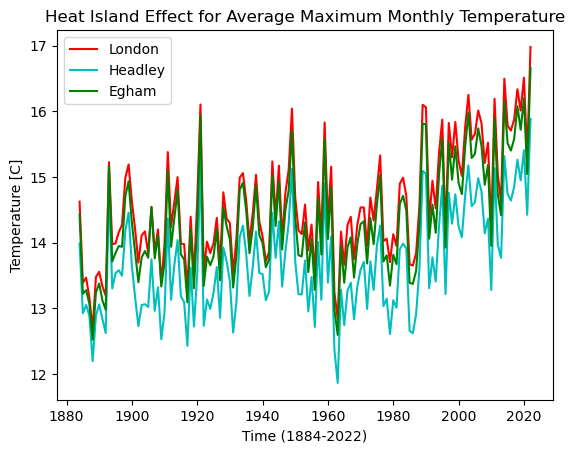

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)

tas = np.array(data['tasmax'])
time = np.array(data['time'])

x = np.array(data['projection_x_coordinate'])
y = np.array(data['projection_y_coordinate'])

lat = np.array(data['latitude'])
lon = np.array(data['longitude'])

temp = block_reduce(tas, block_size=(12,1,1), func=np.mean, cval=np.mean(tas))

time = np.arange(1884,2023)


plt.plot(time, temp[:, 23, 62], 'r', label='London')
plt.plot(time, temp[:, 22, 55], 'c', label='Headley')
plt.plot(time, temp[:, 23, 59], 'g', label='Egham')
plt.legend()
plt.xlabel('Time (1884-2022)')
plt.ylabel('Temperature [C]')
plt.title('Heat Island Effect for Average Maximum Monthly Temperature')

## Linear Fits

## Temperature

### U.K. Average Temperature

The total uncertainty on the temperature measurements is 0.1220649909742882
The slope of the linear fit is 0.009474837000727451
T-statistic: 9.28786676740046
Degrees of Freedom: 137
P-value: 4.440892098500626e-16
Z_score: 9.287866767400415


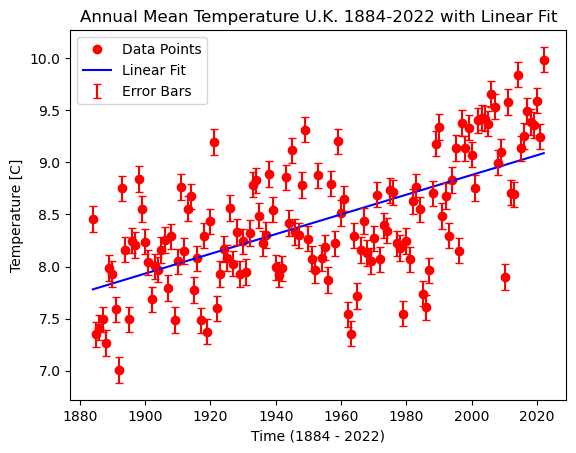

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats


# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tas'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

std = np.nanstd(temp)
std_err = std / np.sqrt(len(temp))
cal_err = 0.01

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the temperature measurements is',err)

temp = np.nanmean(temp, axis=(1, 2))

fit_params = np.polyfit(time, temp, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_temp = fit_line(time)


X_with_constant = sm.add_constant(time)
model = sm.OLS(temp, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, temp, 'ro', label='Data Points')
plt.plot(time, linear_temp, 'b', label='Linear Fit')
plt.errorbar(time, temp, yerr=err, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature U.K. 1884-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Max Temperature

The total uncertainty on the temperature measurements is 0.14292463860854498
The slope of the linear fit is 0.008736546971714127
T-statistic: 7.307663750292331
Degrees of Freedom: 137
P-value: 2.0371926368056847e-11
Z_score: 7.307663750292308


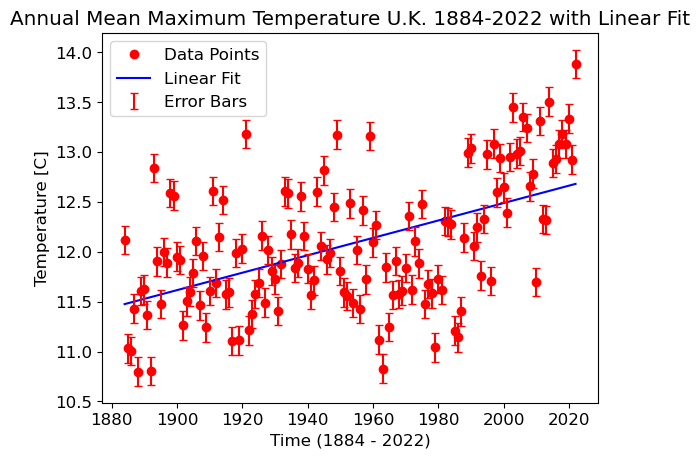

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tasmax'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

std = np.nanstd(temp)
std_err = std / np.sqrt(len(temp))
cal_err = 0.01

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the temperature measurements is',err)

temp = np.nanmean(temp, axis=(1, 2))

fit_params = np.polyfit(time, temp, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_temp = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(temp, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, temp, 'ro', label='Data Points')
plt.plot(time, linear_temp, 'b', label='Linear Fit')
plt.errorbar(time, temp, yerr=err, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Maximum Temperature U.K. 1884-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Minimum Temperature

The total uncertainty on the temperature measurements is 0.11059929276774384
The slope of the linear fit is 0.01000575657488961
T-statistic: 10.877205882627146
Degrees of Freedom: 137
P-value: 0.0
Z_score: 10.87720588262708


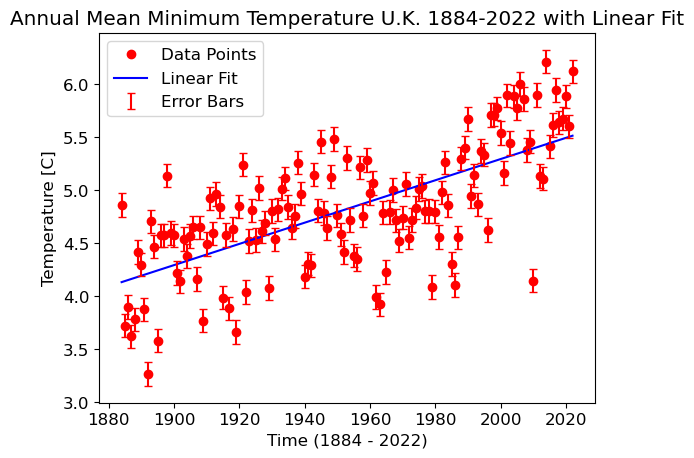

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tasmin'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

std = np.nanstd(temp)
std_err = std / np.sqrt(len(temp))
cal_err = 0.01

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the temperature measurements is',err)

temp = np.nanmean(temp, axis=(1, 2))

fit_params = np.polyfit(time, temp, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_temp = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(temp, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, temp, 'ro', label='Data Points')
plt.plot(time, linear_temp, 'b', label='Linear Fit')
plt.errorbar(time, temp, yerr=err, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Minimum Temperature U.K. 1884-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

## Rain

### U.K. Average Rainfall

The total uncertainty on the rainfall measurements is 3.080706903066313
The slope of the linear fit is 0.07026595345471044
T-statistic: 5.626579129981962
Degrees of Freedom: 185
P-value: 6.712817746112876e-08
Z_score: 5.626579129981983


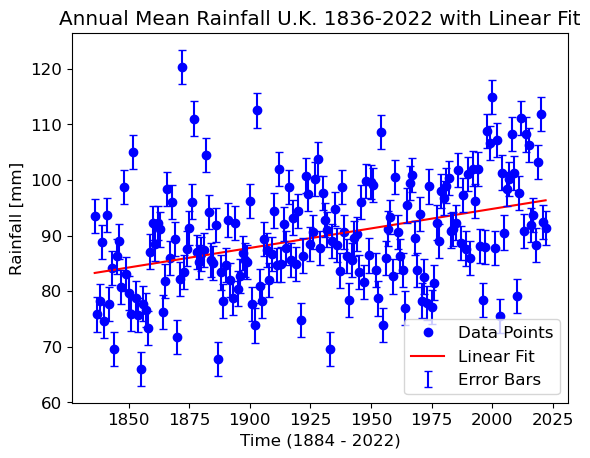

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

# Extract variables
rain_array = np.array(data['rainfall'])
time = np.arange(1836, 2023)
rain = block_reduce(rain_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain_array))

std = np.nanstd(rain)
std_err = std / np.sqrt(len(rain))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the rainfall measurements is',err)

rain = np.nanmean(rain, axis=(1, 2))

fit_params = np.polyfit(time, rain, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_rain = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(rain, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(rain) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, rain, 'bo', label='Data Points')
plt.plot(time, linear_rain, 'r', label='Linear Fit')
plt.errorbar(time, rain, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Rainfall [mm]')
plt.title('Annual Mean Rainfall U.K. 1836-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Seasons

The total uncertainty on the rainfall measurements is 5.348550028879458
The slope of the winter linear fit is 0.4412076734779847
The slope of the spring linear fit is 0.23438318038490466
The slope of the summer linear fit is -0.06041230296969439
The slope of the autumn linear fit is 0.2498347788946485


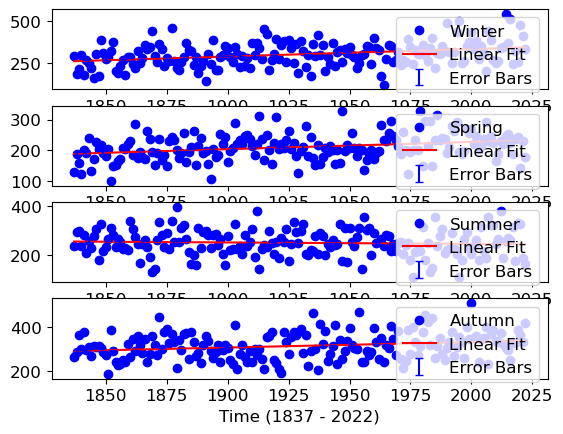

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))

winter = rain[3::4]
summer = rain[5::4]
spring = rain[4::4]
autumn = rain[6::4]

time = np.arange(1837,2023)

std = np.nanstd(winter)
std_err = std / np.sqrt(len(winter))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the rainfall measurements is',err)


fit_params_wint = np.polyfit(time, winter, 1)
fit_line_wint = np.poly1d(fit_params_wint)
print('The slope of the winter linear fit is', fit_params_wint[0])
linear_winter = fit_line_wint(time)

fit_params_spring = np.polyfit(time, spring, 1)
fit_line_spring = np.poly1d(fit_params_spring)
print('The slope of the spring linear fit is', fit_params_spring[0])
linear_spring = fit_line_spring(time)

fit_params_sum = np.polyfit(time, summer, 1)
fit_line_sum = np.poly1d(fit_params_sum)
print('The slope of the summer linear fit is', fit_params_sum[0])
linear_summer = fit_line_sum(time)

fit_params_aut = np.polyfit(time, autumn, 1)
fit_line_aut = np.poly1d(fit_params_aut)
print('The slope of the autumn linear fit is', fit_params_aut[0])
linear_autumn = fit_line_aut(time)

fig, axs = plt.subplots(4)

axs[0].plot(time, winter, 'bo', label='Winter')
axs[0].plot(time, linear_winter, 'r', label='Linear Fit')
axs[0].errorbar(time, winter, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
axs[0].legend(loc='upper right')
axs[1].plot(time, spring, 'bo', label='Spring')
axs[1].plot(time, linear_spring, 'r', label='Linear Fit')
axs[1].errorbar(time, spring, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
axs[1].legend(loc='upper right')
axs[2].plot(time, summer, 'bo', label='Summer')
axs[2].plot(time, linear_summer, 'r', label='Linear Fit')
axs[2].errorbar(time, summer, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
axs[2].legend(loc='upper right')
axs[3].plot(time, autumn, 'bo', label='Autumn')
axs[3].plot(time, linear_autumn, 'r', label='Linear Fit')
axs[3].errorbar(time, autumn, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
axs[3].legend(loc='upper right')
for axs in axs.flat:
    axs.set(xlabel='Time (1837 - 2022)')
plt.rcParams.update({'font.size': 12})

### Winter

The total uncertainty on the winter rainfall measurements is 5.3483823072410415
The slope of the winter linear fit is 0.4412027791806327
T-statistic: 4.658788435245269
Degrees of Freedom: 184
P-value: 6.084045314214137e-06
Z_score: 4.658788435245289


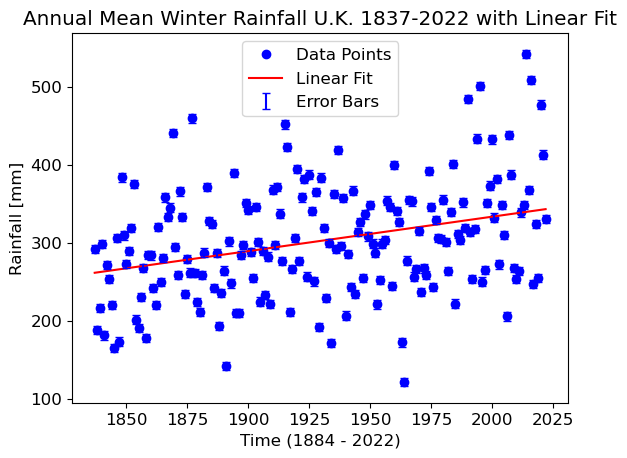

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))

winter = rain[3::4]

time = np.arange(1837,2023)

std = np.nanstd(winter)
std_err = std / np.sqrt(len(winter))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the winter rainfall measurements is',err)

fit_params_wint = np.polyfit(time, winter, 1)
fit_line_wint = np.poly1d(fit_params_wint)
print('The slope of the winter linear fit is', fit_params_wint[0])
linear_winter = fit_line_wint(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(winter, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(winter) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params_wint[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)


plt.plot(time, winter, 'bo', label='Data Points')
plt.plot(time, linear_winter, 'r', label='Linear Fit')
plt.errorbar(time, winter, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Rainfall [mm]')
plt.title('Annual Mean Winter Rainfall U.K. 1837-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Spring

The total uncertainty on the spring rainfall measurements is 3.124582715910956
The slope of the spring linear fit is 0.23438318038490466
T-statistic: 4.195293089863675
Degrees of Freedom: 184
P-value: 4.2339164812776886e-05
Z_score: 4.195293089863664


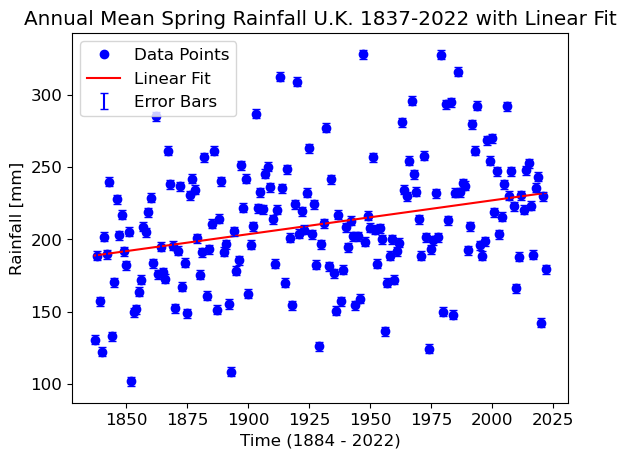

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))


spring = rain[4::4]

time = np.arange(1837,2023)

std = np.nanstd(spring)
std_err = std / np.sqrt(len(spring))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the spring rainfall measurements is',err)

fit_params_spring = np.polyfit(time, spring, 1)
fit_line_spring = np.poly1d(fit_params_spring)
print('The slope of the spring linear fit is', fit_params_spring[0])
linear_spring = fit_line_spring(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(spring, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(spring) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params_spring[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, spring, 'bo', label='Data Points')
plt.plot(time, linear_spring, 'r', label='Linear Fit')
plt.errorbar(time, spring, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Rainfall [mm]')
plt.title('Annual Mean Spring Rainfall U.K. 1837-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

Interesting just looking at the plot for Spring rain it seemed like it was decreasing in the last decade or so. Linear fit shows trend over time increasing.

### Summer

The total uncertainty on the summer rainfall measurements is 4.006758304472652
The slope of the summer linear fit is -0.06041230296969439
T-statistic: -0.806868936791718
Degrees of Freedom: 184
P-value: 0.42078371435051665
Z_score: -0.8068689367917216


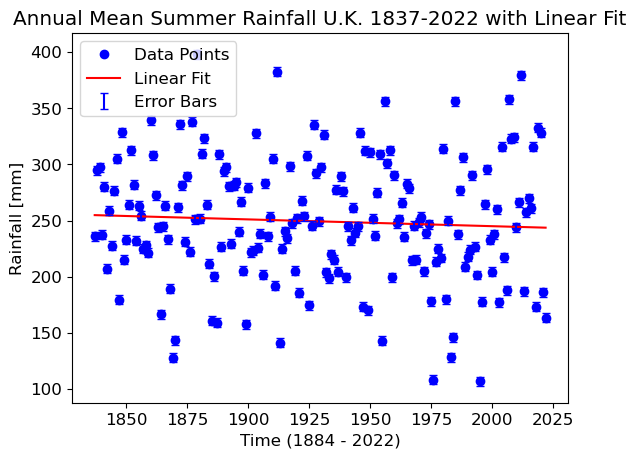

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))


summer = rain[5::4]

time = np.arange(1837,2023)

std = np.nanstd(summer)
std_err = std / np.sqrt(len(summer))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the summer rainfall measurements is',err)

fit_params_sum = np.polyfit(time, summer, 1)
fit_line_sum = np.poly1d(fit_params_sum)
print('The slope of the summer linear fit is', fit_params_sum[0])
linear_summer = fit_line_sum(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(summer, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(summer) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params_sum[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)


plt.plot(time, summer, 'bo', label='Data Points')
plt.plot(time, linear_summer, 'r', label='Linear Fit')
plt.errorbar(time, summer, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Rainfall [mm]')
plt.title('Annual Mean Summer Rainfall U.K. 1837-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Autumn

The total uncertainty on the autumn rainfall measurements is 4.453622524142224
The slope of the autumn linear fit is 0.2498347788946485
T-statistic: 3.0724264167919295
Degrees of Freedom: 184
P-value: 0.0024457291457251618
Z_score: 3.072426416791929


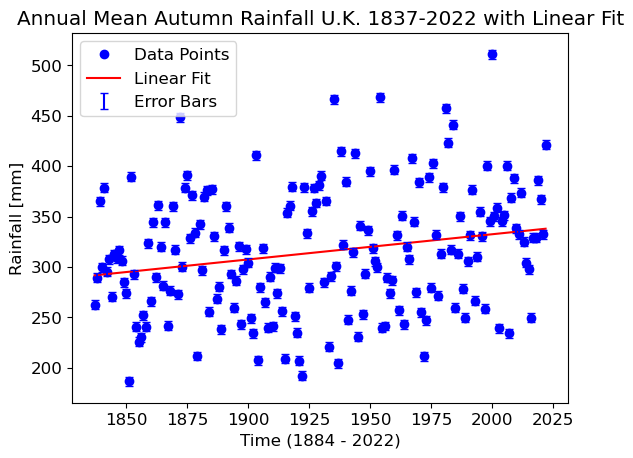

In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))


autumn = rain[6::4]

time = np.arange(1837,2023)

std = np.nanstd(autumn)
std_err = std / np.sqrt(len(autumn))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the autumn rainfall measurements is',err)

fit_params_aut = np.polyfit(time, autumn, 1)
fit_line_aut = np.poly1d(fit_params_aut)
print('The slope of the autumn linear fit is', fit_params_aut[0])
linear_autumn = fit_line_aut(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(autumn, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(autumn) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params_aut[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, autumn, 'bo', label='Data Points')
plt.plot(time, linear_autumn, 'r', label='Linear Fit')
plt.errorbar(time, autumn, yerr=err, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Rainfall [mm]')
plt.title('Annual Mean Autumn Rainfall U.K. 1837-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

## Wind

### U.K. Average Wind Speed

The total uncertainty on the rainfall measurements is 0.15114442411536683
The slope of the linear fit is -0.008589203974276823
T-statistic: -4.488607035770331
Degrees of Freedom: 52
P-value: 4.002987343199038e-05
Z_score: -4.488607035770373


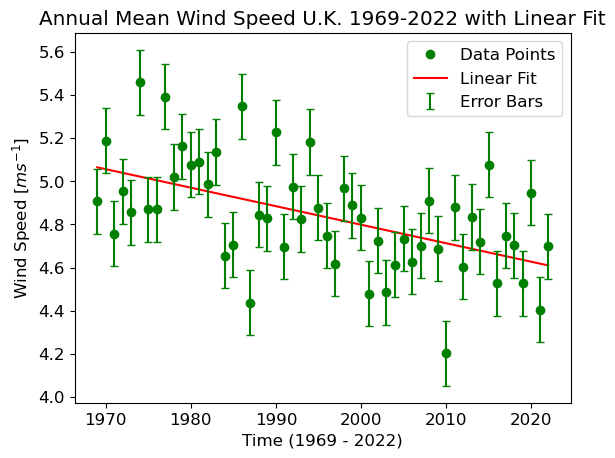

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

# Extract variables
wind_array = np.array(data['sfcWind'])
time = np.arange(1969, 2023)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))

std = np.nanstd(wind)
std_err = std / np.sqrt(len(wind))
cal_err = 0.01

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the rainfall measurements is',err)

wind = np.nanmean(wind, axis=(1, 2))

fit_params = np.polyfit(time, wind, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_wind = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(wind, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(wind) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, wind, 'go', label='Data Points')
plt.plot(time, linear_wind, 'r', label='Linear Fit')
plt.errorbar(time, wind, yerr=err, fmt='none', color='g', capsize=3, label='Error Bars')
plt.xlabel('Time (1969 - 2022)')
plt.ylabel('Wind Speed [$ms^{-1}$]')
plt.title('Annual Mean Wind Speed U.K. 1969-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Winter

The total uncertainty on the winter wind measurements is 0.1317079309064461
The slope of the linear fit is -0.007681347270973209
T-statistic: -1.369232999431541
Degrees of Freedom: 51
P-value: 0.17692638441235697
Z_score: -1.3692329994315662


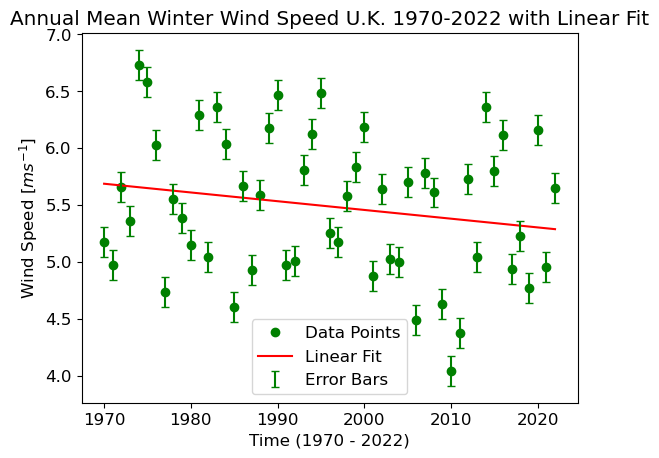

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Wind_Seasonal\*.nc", parallel=True)

# Extract variables
wind = np.array(data['sfcWind'])
time = np.arange(1970, 2023)
wind = np.nanmean(wind, axis=(1, 2))

winter = wind[3::4]
summer = wind[5::4]
spring = wind[4::4]
autumn = wind[6::4]

std = np.nanstd(winter)
std_err = std / np.sqrt(len(winter))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the winter wind measurements is',err)

fit_params = np.polyfit(time, winter, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_winter = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(winter, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(winter) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, winter, 'go', label='Data Points')
plt.plot(time, linear_winter, 'r', label='Linear Fit')
plt.errorbar(time, winter, yerr=err, fmt='none', color='g', capsize=3, label='Error Bars')
plt.xlabel('Time (1970 - 2022)')
plt.ylabel('Wind Speed [$ms^{-1}$]')
plt.title('Annual Mean Winter Wind Speed U.K. 1970-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Spring

The total uncertainty on the spring wind measurements is 0.11380134985999468
The slope of the linear fit is -0.011702661328082013
T-statistic: -3.625495630752052
Degrees of Freedom: 51
P-value: 0.0006656366448980489
Z_score: -3.6254956307520296


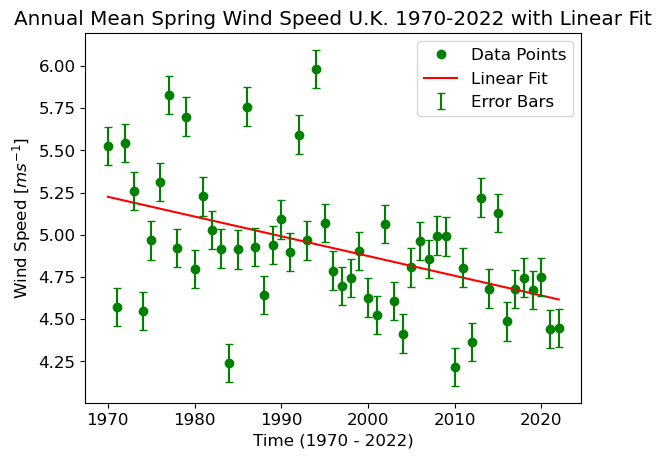

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Wind_Seasonal\*.nc", parallel=True)

# Extract variables
wind = np.array(data['sfcWind'])
time = np.arange(1970, 2023)
wind = np.nanmean(wind, axis=(1, 2))

winter = wind[3::4]
summer = wind[5::4]
spring = wind[4::4]
autumn = wind[6::4]


std = np.nanstd(spring)
std_err = std / np.sqrt(len(spring))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the spring wind measurements is',err)



fit_params = np.polyfit(time, spring, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_spring = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(spring, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(spring) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, spring, 'go', label='Data Points')
plt.plot(time, linear_spring, 'r', label='Linear Fit')
plt.errorbar(time, spring, yerr=err, fmt='none', color='g', capsize=3, label='Error Bars')
plt.xlabel('Time (1970 - 2022)')
plt.ylabel('Wind Speed [$ms^{-1}$]')
plt.title('Annual Mean Spring Wind Speed U.K. 1970-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Summer

The total uncertainty on the summer wind measurements is 0.10552360026983164
The slope of the linear fit is -0.005428375430122634
T-statistic: -2.5692948847367703
Degrees of Freedom: 51
P-value: 0.01315807086670362
Z_score: -2.569294884736773


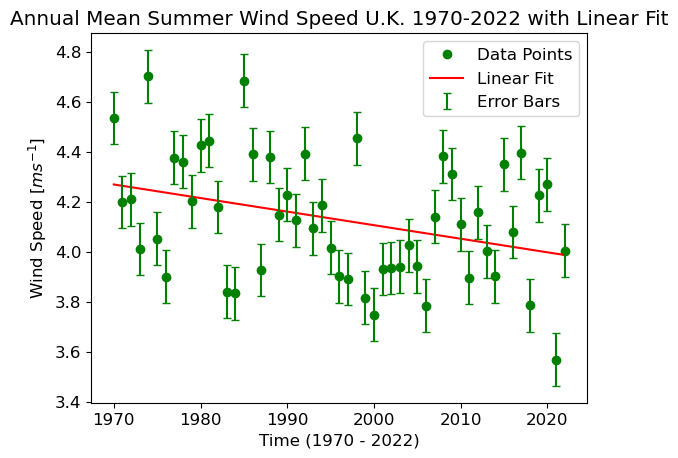

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Wind_Seasonal\*.nc", parallel=True)

# Extract variables
wind = np.array(data['sfcWind'])
time = np.arange(1970, 2023)
wind = np.nanmean(wind, axis=(1, 2))

winter = wind[3::4]
summer = wind[5::4]
spring = wind[4::4]
autumn = wind[6::4]


std = np.nanstd(summer)
std_err = std / np.sqrt(len(summer))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the summer wind measurements is',err)



fit_params = np.polyfit(time, summer, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_summer = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(summer, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(summer) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, summer, 'go', label='Data Points')
plt.plot(time, linear_summer, 'r', label='Linear Fit')
plt.errorbar(time, summer, yerr=err, fmt='none', color='g', capsize=3, label='Error Bars')
plt.xlabel('Time (1970 - 2022)')
plt.ylabel('Wind Speed [$ms^{-1}$]')
plt.title('Annual Mean Summer Wind Speed U.K. 1970-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Autumn

The total uncertainty on the autumn wind measurements is 0.11466472809098824
The slope of the linear fit is -0.0105236436755112
T-statistic: -3.0623772748050326
Degrees of Freedom: 51
P-value: 0.003500907222124372
Z_score: -3.0623772748050277


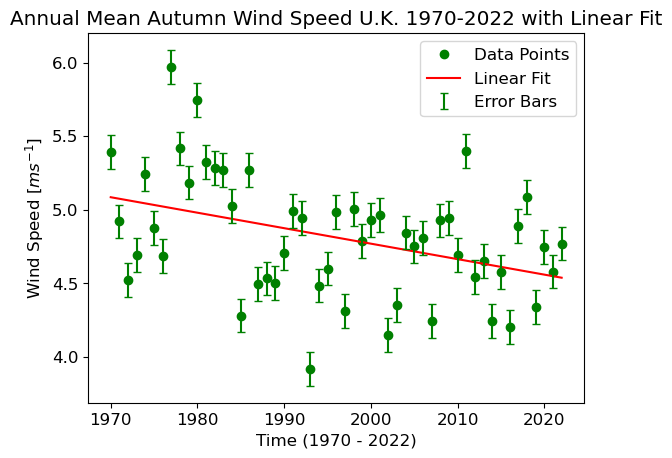

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Wind_Seasonal\*.nc", parallel=True)

# Extract variables
wind = np.array(data['sfcWind'])
time = np.arange(1970, 2023)
wind = np.nanmean(wind, axis=(1, 2))

winter = wind[3::4]
summer = wind[5::4]
spring = wind[4::4]
autumn = wind[6::4]


std = np.nanstd(autumn)
std_err = std / np.sqrt(len(autumn))
cal_err = 0.1

err = np.sqrt((cal_err**2)+(std_err**2))
print('The total uncertainty on the autumn wind measurements is',err)



fit_params = np.polyfit(time, autumn, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_autumn = fit_line(time)

X_with_constant = sm.add_constant(time)
model = sm.OLS(autumn, X_with_constant)
results = model.fit()

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(autumn) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

null_hypothesis_value = 0  
z_score = (fit_params[0] - null_hypothesis_value) / results.bse[1]

print("T-statistic:", t_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)
print("Z_score:", z_score)

plt.plot(time, autumn, 'go', label='Data Points')
plt.plot(time, linear_autumn, 'r', label='Linear Fit')
plt.errorbar(time, autumn, yerr=err, fmt='none', color='g', capsize=3, label='Error Bars')
plt.xlabel('Time (1970 - 2022)')
plt.ylabel('Wind Speed [$ms^{-1}$]')
plt.title('Annual Mean Autumn Wind Speed U.K. 1970-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

## Highest Daily Values

### Rain

In [2]:
import xarray as xr
import numpy as np


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Day_Rain\*.nc", parallel=True)

rain_array = np.array(data['rainfall'])

largest_value = np.nanmax(rain_array)

index_of_largest_value = np.unravel_index(np.nanargmax(rain_array), rain_array.shape)

print(largest_value)
print(index_of_largest_value)

time = np.array(data['time'])
lat = np.array(data['latitude'])
lon = np.array(data['longitude'])

print(time[23573])
print(lat[16,48], lon[16,48])

print('The largest volume of rain which fell in a day occurred on the 18th of July 1955 close to the town of Dorchester in Southwest England.')

223.09279355513692
(23573, 16, 48)
1955-07-18T12:00:00.000000000
50.70806527162102 -2.4815721848433454
The largest volume of rain which fell in a day occurred on the 18th of July 1955 close to the town of Dorchester in Southwest England.


### Maximum Temperature

In [3]:
import xarray as xr
import numpy as np


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Day_tmax\*.nc", parallel=True)

temp_array = np.array(data['tasmax'])

largest_value = np.nanmax(temp_array)

index_of_largest_value = np.unravel_index(np.nanargmax(temp_array), temp_array.shape)

print(largest_value)
print(index_of_largest_value)

time = np.array(data['time'])
lat = np.array(data['latitude'])
lon = np.array(data['longitude'])


print(time[22845])
print(lat[41,57], lon[41,57])

print('The highest single temperature recorded occurred on the 19th of July 2022 near the town of Gainsborough in East England.')

40.468165963768705
(22845, 41, 57)
2022-07-19T12:00:00.000000000
53.401368426658486 -0.8868622804925629
The highest single temperature recorded occurred on the 19th of July 2022 near the town of Gainsborough in East England.


### Minimum Temperature

In [3]:
import xarray as xr
import numpy as np


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Day_tmin\*.nc", parallel=True)

temp_array = np.array(data['tasmin'])

largest_value = np.nanmin(temp_array)

index_of_largest_value = np.unravel_index(np.nanargmin(temp_array), temp_array.shape)

print(largest_value)
print(index_of_largest_value)

time = np.array(data['time'])
lat = np.array(data['latitude'])
lon = np.array(data['longitude'])

print(time[8045])
print(lat[75,45], lon[74,45])

print('The lowest temperature recorded occurred on the 10th of January 1982 in Cairngorms National Park in Scotland.')

-23.995316531432174
(8045, 75, 44)
1982-01-10T12:00:00.000000000
57.06788313536905 -3.151214980634017
The lowest temperature recorded occurred on the 10th of January 1982 in Cairngorms National Park in Scotland.


## Regional Linear Fits

## North vs South

### Temperature

The total uncertainty on the southern temperature measurements is 0.05804993030316079
The slope of the southern linear fit is 0.010580533052241846
The total uncertainty on the northern temperature measurements is 0.05286478192409925
The slope of the northern linear fit is 0.009420357093489387
T-statistic North: 9.300024477836734
Degrees of Freedom North: 137
P-value North: 2.220446049250313e-16
Z_score North: 9.300024477836734
T-statistic south: 9.60320853751156
Degrees of Freedom south: 137
P-value south: 0.0
Z_score south: 9.603208537511552


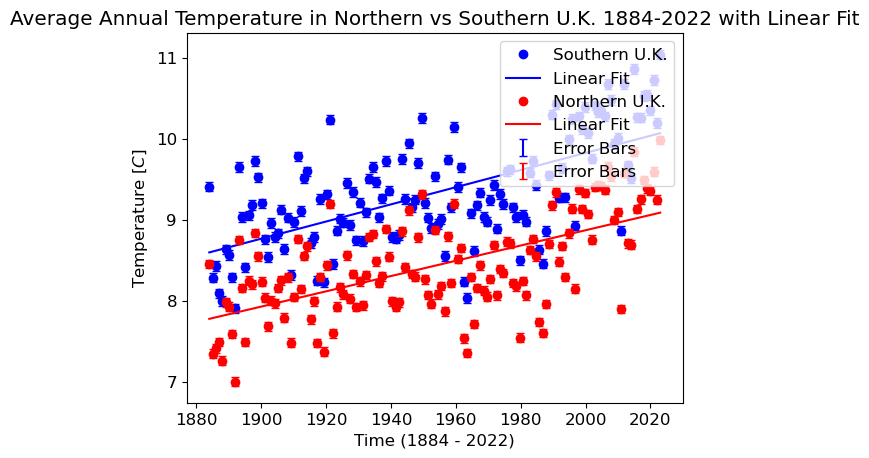

In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)


std1 = np.nanstd(temp_mean_south)
std_err1 = std1 / np.sqrt(len(temp_mean_south))
cal_err1 = 0.01

err1 = np.sqrt((cal_err1**2)+(std_err1**2))
print('The total uncertainty on the southern temperature measurements is',err1)

fit_params = np.polyfit(time, temp_mean_south, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the southern linear fit is', fit_params[0])

linear_temp_mean_south = fit_line(time)

std2 = np.nanstd(temp_mean_north)
std_err2 = std2 / np.sqrt(len(temp_mean_north))
cal_err2 = 0.01

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
print('The total uncertainty on the northern temperature measurements is',err2)

fit_params1 = np.polyfit(time, temp_mean_north, 1)
fit_line1 = np.poly1d(fit_params1)
print('The slope of the northern linear fit is', fit_params1[0])

linear_temp_mean_north = fit_line1(time)

X_with_constant = sm.add_constant(time)
model_north = sm.OLS(temp_mean_north, X_with_constant)
results_north = model_north.fit()

t_statistic_north = results_north.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_north = len(temp_mean_north) - 2
p_value_north = 2 * (1 - stats.t.cdf(np.abs(t_statistic_north), df=degrees_of_freedom_north))

null_hypothesis_value = 0  
z_score_north = (fit_params1[0] - null_hypothesis_value) / results_north.bse[1]

print("T-statistic North:", t_statistic_north)
print("Degrees of Freedom North:", degrees_of_freedom_north)
print("P-value North:", p_value_north)
print("Z_score North:", z_score_north)

X_with_constant = sm.add_constant(time)
model_south = sm.OLS(temp_mean_south, X_with_constant)
results_south = model_south.fit()

t_statistic_south = results_south.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_south = len(temp_mean_south) - 2
p_value_south = 2 * (1 - stats.t.cdf(np.abs(t_statistic_south), df=degrees_of_freedom_south))

null_hypothesis_value = 0  
z_score_south = (fit_params[0] - null_hypothesis_value) / results_south.bse[1]

print("T-statistic south:", t_statistic_south)
print("Degrees of Freedom south:", degrees_of_freedom_south)
print("P-value south:", p_value_south)
print("Z_score south:", z_score_south)


plt.plot(time, temp_mean_south, 'bo', label='Southern U.K.')
plt.plot(time, linear_temp_mean_south, 'b', label='Linear Fit')
plt.errorbar(time, temp_mean_south, yerr=err1, fmt='none', color='b', capsize=3, label='Error Bars')
plt.plot(time, temp_mean_north, 'ro', label='Northern U.K.')
plt.plot(time, linear_temp_mean_north, 'r', label='Linear Fit')
plt.errorbar(time, temp_mean_north, yerr=err2, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature in Northern vs Southern U.K. 1884-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')


### Rainfall

The total uncertainty on the northern rainfall measurements is 0.739363200429282
The slope of the linear fit is 0.07220717265631692
The total uncertainty on the southern rainfall measurements is 0.7188648706463915
The slope of the linear fit is 0.036008587636879544
T-statistic North: 5.781430410351891
Degrees of Freedom North: 185
P-value North: 3.099456113986321e-08
Z_score North: 5.7814304103518745
T-statistic south: 2.787230540763941
Degrees of Freedom south: 185
P-value south: 0.005870927118877711
Z_score south: 2.7872305407639475


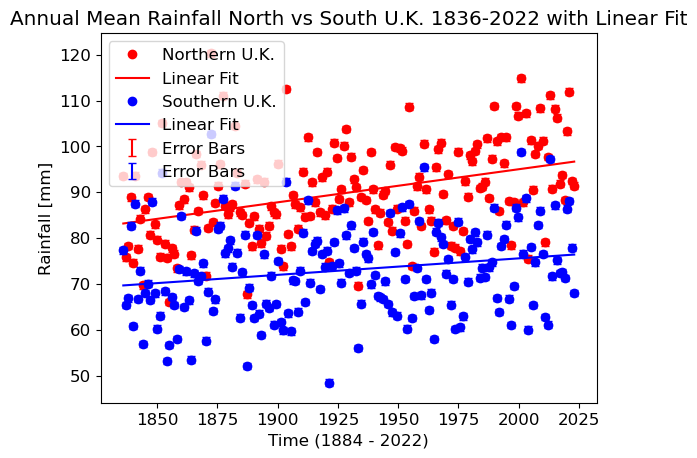

In [29]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 2244 // 12
rain_reshaped = rain[:num_years * 12].reshape(num_years, 12, -1)  

rain_mean_north = np.nanmean(rain_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1836,2023, 187)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
rain_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    rain_year = rain[start_idx:end_idx, :southern_lat_index, :]
    rain_mean_south[i] = np.nanmean(rain_year)
    
std1 = np.nanstd(rain_mean_north)
std_err1 = std1 / np.sqrt(len(rain_mean_north))
cal_err1 = 0.1

err1 = np.sqrt((cal_err1**2)+(std_err1**2))
print('The total uncertainty on the northern rainfall measurements is',err1)

fit_params1 = np.polyfit(time, rain_mean_north, 1)
fit_line = np.poly1d(fit_params1)
print('The slope of the linear fit is', fit_params1[0])

linear_rain_mean_north = fit_line(time)

std2 = np.nanstd(rain_mean_south)
std_err2 = std2 / np.sqrt(len(rain_mean_south))
cal_err2 = 0.1

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
print('The total uncertainty on the southern rainfall measurements is',err2)

fit_params2 = np.polyfit(time, rain_mean_south, 1)
fit_line = np.poly1d(fit_params2)
print('The slope of the linear fit is', fit_params2[0])

linear_rain_mean_south = fit_line(time)

X_with_constant = sm.add_constant(time)
model_north = sm.OLS(rain_mean_north, X_with_constant)
results_north = model_north.fit()

t_statistic_north = results_north.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_north = len(rain_mean_north) - 2
p_value_north = 2 * (1 - stats.t.cdf(np.abs(t_statistic_north), df=degrees_of_freedom_north))

null_hypothesis_value = 0  
z_score_north = (fit_params1[0] - null_hypothesis_value) / results_north.bse[1]

print("T-statistic North:", t_statistic_north)
print("Degrees of Freedom North:", degrees_of_freedom_north)
print("P-value North:", p_value_north)
print("Z_score North:", z_score_north)

X_with_constant = sm.add_constant(time)
model_south = sm.OLS(rain_mean_south, X_with_constant)
results_south = model_south.fit()

t_statistic_south = results_south.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_south = len(rain_mean_south) - 2
p_value_south = 2 * (1 - stats.t.cdf(np.abs(t_statistic_south), df=degrees_of_freedom_south))

null_hypothesis_value = 0  
z_score_south = (fit_params2[0] - null_hypothesis_value) / results_south.bse[1]

print("T-statistic south:", t_statistic_south)
print("Degrees of Freedom south:", degrees_of_freedom_south)
print("P-value south:", p_value_south)
print("Z_score south:", z_score_south)

plt.plot(time, rain_mean_north, 'ro', label='Northern U.K.')
plt.plot(time, linear_rain_mean_north, 'r', label='Linear Fit')
plt.errorbar(time, rain_mean_north, yerr=err1, fmt='none', color='r', capsize=3, label='Error Bars')
plt.plot(time, rain_mean_south, 'bo', label='Southern U.K.')
plt.plot(time, linear_rain_mean_south, 'b', label='Linear Fit')
plt.errorbar(time, rain_mean_south, yerr=err2, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Rainfall [mm]')
plt.title('Annual Mean Rainfall North vs South U.K. 1836-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Wind

The total uncertainty on the northern wind measurements is 0.035943404950441245
The slope of the northern linear fit is -0.008464405766397693
The total uncertainty on the southern wind measurements is 0.03518176352873565
The slope of the southern linear fit is -0.008076949963834576
T-statistic North: -4.504718438026379
Degrees of Freedom North: 52
P-value North: 3.7908073900805306e-05
Z_score North: -4.5047184380264325
T-statistic south: -4.360609353718027
Degrees of Freedom south: 52
P-value south: 6.154269994240735e-05
Z_score south: -4.360609353718083


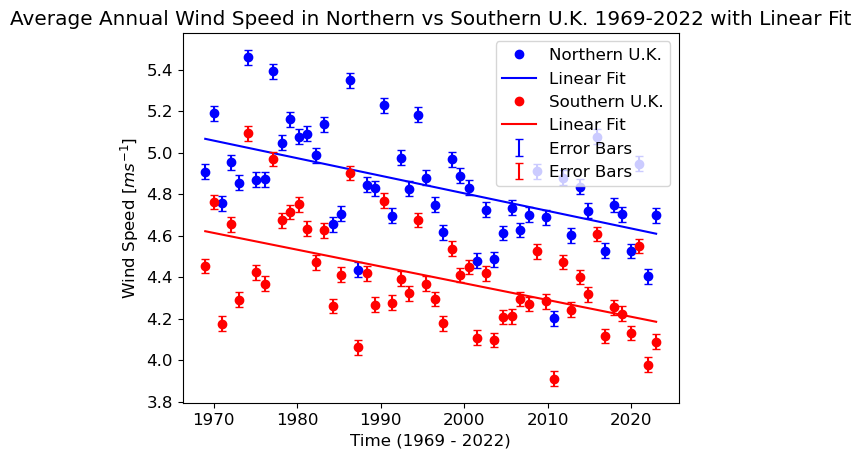

In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

wind_array = np.array(data['sfcWind'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 648 // 12
wind_reshaped = wind_array[:num_years * 12].reshape(num_years, 12, -1)  

wind_mean_north = np.nanmean(wind_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1969,2023, 54)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
wind_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    wind_year = wind_array[start_idx:end_idx, :southern_lat_index, :]
    wind_mean_south[i] = np.nanmean(wind_year)

std1 = np.nanstd(wind_mean_north)
std_err1 = std1 / np.sqrt(len(wind_mean_north))
cal_err1 = 0.01

err1 = np.sqrt((cal_err1**2)+(std_err1**2))
print('The total uncertainty on the northern wind measurements is',err1)

fit_params = np.polyfit(time, wind_mean_north, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the northern linear fit is', fit_params[0])

linear_wind_mean_north = fit_line(time)

std2 = np.nanstd(wind_mean_south)
std_err2 = std2 / np.sqrt(len(wind_mean_south))
cal_err2 = 0.01

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
print('The total uncertainty on the southern wind measurements is',err2)

fit_params1 = np.polyfit(time, wind_mean_south, 1)
fit_line1 = np.poly1d(fit_params1)
print('The slope of the southern linear fit is', fit_params1[0])

linear_wind_mean_south = fit_line1(time)

X_with_constant = sm.add_constant(time)
model_north = sm.OLS(wind_mean_north, X_with_constant)
results_north = model_north.fit()

t_statistic_north = results_north.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_north = len(wind_mean_north) - 2
p_value_north = 2 * (1 - stats.t.cdf(np.abs(t_statistic_north), df=degrees_of_freedom_north))

null_hypothesis_value = 0  
z_score_north = (fit_params[0] - null_hypothesis_value) / results_north.bse[1]

print("T-statistic North:", t_statistic_north)
print("Degrees of Freedom North:", degrees_of_freedom_north)
print("P-value North:", p_value_north)
print("Z_score North:", z_score_north)

X_with_constant = sm.add_constant(time)
model_south = sm.OLS(wind_mean_south, X_with_constant)
results_south = model_south.fit()

t_statistic_south = results_south.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_south = len(wind_mean_south) - 2
p_value_south = 2 * (1 - stats.t.cdf(np.abs(t_statistic_south), df=degrees_of_freedom_south))

null_hypothesis_value = 0  
z_score_south = (fit_params1[0] - null_hypothesis_value) / results_south.bse[1]

print("T-statistic south:", t_statistic_south)
print("Degrees of Freedom south:", degrees_of_freedom_south)
print("P-value south:", p_value_south)
print("Z_score south:", z_score_south)

plt.plot(time, wind_mean_north, 'bo', label='Northern U.K.')
plt.plot(time, linear_wind_mean_north, 'b', label='Linear Fit')
plt.errorbar(time, wind_mean_north, yerr=err1, fmt='none', color='b', capsize=3, label='Error Bars')
plt.plot(time, wind_mean_south, 'ro', label='Southern U.K.')
plt.plot(time, linear_wind_mean_south, 'r', label='Linear Fit')
plt.errorbar(time, wind_mean_south, yerr=err2, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1969 - 2022)')
plt.ylabel('Wind Speed $[ms^{-1}]$')
plt.title('Average Annual Wind Speed in Northern vs Southern U.K. 1969-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')

## East vs West

### Temperature

The total uncertainty on the eastern temperature measurements is 0.05247641695895416
The slope of the eastern linear fit is 0.009404987509448388
The total uncertainty on the western temperature measurements is 0.049183957949371686
The slope of the western linear fit is 0.008382782198105728
T-statistic east: 9.281791920677893
Degrees of Freedom east: 137
P-value east: 4.440892098500626e-16
Z_score east: 9.281791920677838
T-statistic west: 8.60729828685929
Degrees of Freedom west: 137
P-value west: 1.5765166949677223e-14
Z_score west: 8.607298286859233


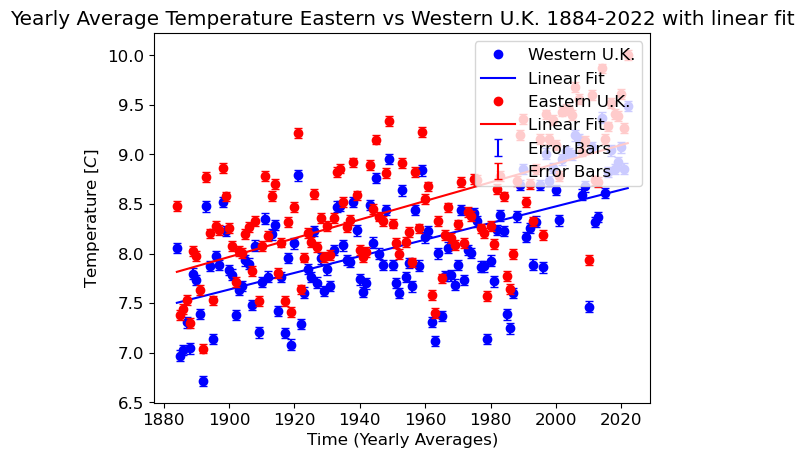

In [31]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

# Load your data as you did before
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])

longitude_threshold = -2.0

# Find the index where longitude crosses the threshold
eastern_lon_index = np.where(lon <= longitude_threshold)[0][-1]

# Calculate the mean temperature for each year in the eastern U.K.
num_years = 1668 // 12
temp_mean_eastern_uk = np.empty(num_years)

for i in range(num_years):
    start_idx = (i) * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :, :eastern_lon_index + 1]
    temp_mean_eastern_uk[i] = np.nanmean(temp_year)


dividing_lon = -2.0

# Create a boolean mask for the western part of the UK
western_mask = lon <= dividing_lon

# Reshape the temperature data to have (time, lat, lon)
temp_reshaped = tas_array[:, :, :]

# Reshape the western_mask to match the dimensions of temp_reshaped
reshaped_western_mask = western_mask.reshape(1, western_mask.shape[0], western_mask.shape[1])

# Calculate the annual average temperature for the western UK
annual_temp_mean_west_uk = np.nanmean(temp_reshaped[:, reshaped_western_mask[0]], axis=(1,))

temp = block_reduce(annual_temp_mean_west_uk, block_size=(12), func=np.mean, cval=np.mean(annual_temp_mean_west_uk))

# Create an array for the years
time = np.arange(1884, 2023)



std1 = np.nanstd(temp_mean_eastern_uk)
std_err1 = std1 / np.sqrt(len(temp_mean_eastern_uk))
cal_err1 = 0.01

err1 = np.sqrt((cal_err1**2)+(std_err1**2))
print('The total uncertainty on the eastern temperature measurements is',err1)
fit_params = np.polyfit(time, temp_mean_eastern_uk, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the eastern linear fit is', fit_params[0])

linear_temp_mean_eastern_uk = fit_line(time)


std2 = np.nanstd(temp)
std_err2 = std2 / np.sqrt(len(temp))
cal_err2 = 0.01

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
print('The total uncertainty on the western temperature measurements is',err2)
fit_params1 = np.polyfit(time, temp, 1)
fit_line = np.poly1d(fit_params1)
print('The slope of the western linear fit is', fit_params1[0])

linear_temp = fit_line(time)


X_with_constant = sm.add_constant(time)
model_east = sm.OLS(temp_mean_eastern_uk, X_with_constant)
results_east = model_east.fit()

t_statistic_east = results_east.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_east = len(temp_mean_eastern_uk) - 2
p_value_east = 2 * (1 - stats.t.cdf(np.abs(t_statistic_east), df=degrees_of_freedom_east))

null_hypothesis_value = 0  
z_score_east = (fit_params[0] - null_hypothesis_value) / results_east.bse[1]

print("T-statistic east:", t_statistic_east)
print("Degrees of Freedom east:", degrees_of_freedom_east)
print("P-value east:", p_value_east)
print("Z_score east:", z_score_east)

X_with_constant = sm.add_constant(time)
model_west = sm.OLS(temp, X_with_constant)
results_west = model_west.fit()

t_statistic_west = results_west.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_west = len(temp) - 2
p_value_west = 2 * (1 - stats.t.cdf(np.abs(t_statistic_west), df=degrees_of_freedom_west))

null_hypothesis_value = 0  
z_score_west = (fit_params1[0] - null_hypothesis_value) / results_west.bse[1]

print("T-statistic west:", t_statistic_west)
print("Degrees of Freedom west:", degrees_of_freedom_west)
print("P-value west:", p_value_west)
print("Z_score west:", z_score_west)

plt.plot(time, temp, 'bo', label='Western U.K.')
plt.plot(time, linear_temp, 'b', label='Linear Fit')
plt.errorbar(time, temp, yerr=err1, fmt='none', color='b', capsize=3, label='Error Bars')
plt.plot(time, temp_mean_eastern_uk, 'ro', label='Eastern U.K.')
plt.plot(time, linear_temp_mean_eastern_uk, 'r', label='Linear Fit')
plt.errorbar(time, temp_mean_eastern_uk, yerr=err2, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (Yearly Averages)')
plt.ylabel('Temperature $[C]$')
plt.title('Yearly Average Temperature Eastern vs Western U.K. 1884-2022 with linear fit')
plt.legend(loc='upper right')
plt.rcParams.update({'font.size': 12})

plt.show()

### Rainfall

The total uncertainty on the eastern rainfall measurements is 0.7321399863094492
The slope of the linear fit is 0.07030934047673854
The total uncertainty on the western rainfall measurements is 0.8924406342581365
The slope of the linear fit is 0.09723399974995621
T-statistic east: 5.633799672877319
Degrees of Freedom east: 185
P-value east: 6.477195246823442e-08
Z_score east: 5.633799672877335
T-statistic west: 6.53034136250296
Degrees of Freedom west: 185
P-value west: 6.149685205514288e-10
Z_score west: 6.5303413625029805


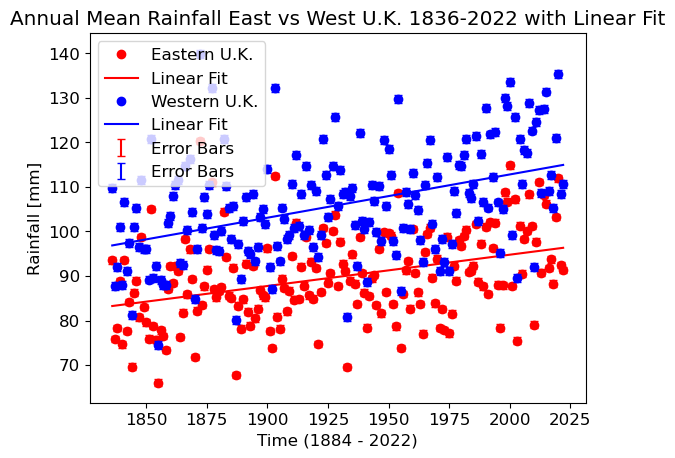

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
rain_array = np.array(data['rainfall'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])

longitude_threshold = -2.0

# Find the index where longitude crosses the threshold
eastern_lon_index = np.where(lon <= longitude_threshold)[0][-1]

num_years = 2244 // 12
rain_mean_eastern_uk = np.empty(num_years)

for i in range(num_years):
    start_idx = (i) * 12
    end_idx = (i + 1) * 12
    rain_year = rain_array[start_idx:end_idx, :, :eastern_lon_index + 1]
    rain_mean_eastern_uk[i] = np.nanmean(rain_year)


dividing_lon = -2.0

# Create a boolean mask for the western part of the UK
western_mask = lon <= dividing_lon

# Reshape the temperature data to have (time, lat, lon)
rain_reshaped = rain_array[:, :, :]

# Reshape the western_mask to match the dimensions of temp_reshaped
reshaped_western_mask = western_mask.reshape(1, western_mask.shape[0], western_mask.shape[1])

# Calculate the annual average temperature for the western UK
annual_rain_mean_west_uk = np.nanmean(rain_reshaped[:, reshaped_western_mask[0]], axis=(1,))

rain = block_reduce(annual_rain_mean_west_uk, block_size=(12), func=np.mean, cval=np.mean(annual_rain_mean_west_uk))

# Create an array for the years
time = np.arange(1836, 2023)

std1 = np.nanstd(rain_mean_eastern_uk)
std_err1 = std1 / np.sqrt(len(rain_mean_eastern_uk))
cal_err1 = 0.1

err1 = np.sqrt((cal_err1**2)+(std_err1**2))
print('The total uncertainty on the eastern rainfall measurements is',err1)

fit_params1 = np.polyfit(time, rain_mean_eastern_uk, 1)
fit_line = np.poly1d(fit_params1)
print('The slope of the linear fit is', fit_params1[0])

linear_rain_mean_eastern_uk = fit_line(time)

std2 = np.nanstd(rain)
std_err2 = std2 / np.sqrt(len(rain))
cal_err2 = 0.1

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
print('The total uncertainty on the western rainfall measurements is',err2)

fit_params2 = np.polyfit(time, rain, 1)
fit_line = np.poly1d(fit_params2)
print('The slope of the linear fit is', fit_params2[0])

linear_rain = fit_line(time)


X_with_constant = sm.add_constant(time)
model_east = sm.OLS(rain_mean_eastern_uk, X_with_constant)
results_east = model_east.fit()

t_statistic_east = results_east.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_east = len(rain_mean_eastern_uk) - 2
p_value_east = 2 * (1 - stats.t.cdf(np.abs(t_statistic_east), df=degrees_of_freedom_east))

null_hypothesis_value = 0  
z_score_east = (fit_params1[0] - null_hypothesis_value) / results_east.bse[1]

print("T-statistic east:", t_statistic_east)
print("Degrees of Freedom east:", degrees_of_freedom_east)
print("P-value east:", p_value_east)
print("Z_score east:", z_score_east)

X_with_constant = sm.add_constant(time)
model_west = sm.OLS(rain, X_with_constant)
results_west = model_west.fit()

t_statistic_west = results_west.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_west = len(rain) - 2
p_value_west = 2 * (1 - stats.t.cdf(np.abs(t_statistic_west), df=degrees_of_freedom_west))

null_hypothesis_value = 0  
z_score_west = (fit_params2[0] - null_hypothesis_value) / results_west.bse[1]

print("T-statistic west:", t_statistic_west)
print("Degrees of Freedom west:", degrees_of_freedom_west)
print("P-value west:", p_value_west)
print("Z_score west:", z_score_west)

plt.plot(time, rain_mean_eastern_uk, 'ro', label='Eastern U.K.')
plt.plot(time, linear_rain_mean_eastern_uk, 'r', label='Linear Fit')
plt.errorbar(time, rain_mean_eastern_uk, yerr=err1, fmt='none', color='r', capsize=3, label='Error Bars')
plt.plot(time, rain, 'bo', label='Western U.K.')
plt.plot(time, linear_rain, 'b', label='Linear Fit')
plt.errorbar(time, rain, yerr=err2, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Rainfall [mm]')
plt.title('Annual Mean Rainfall East vs West U.K. 1836-2022 with Linear Fit')
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.show()

### Wind

The total uncertainty on the eastern wind measurements is 0.0353391308821717
The slope of the eastern linear fit is -0.007917224688166368
The total uncertainty on the western wind measurements is 0.0371933695194638
The slope of the western linear fit is -0.007987719427978745
T-statistic east: -4.112699266950858
Degrees of Freedom east: 52
P-value east: 0.00013960931429868317
Z_score east: -4.112699266950899
T-statistic west: -3.870391748861628
Degrees of Freedom west: 52
P-value west: 0.0003048311354039157
Z_score west: -3.87039174886167


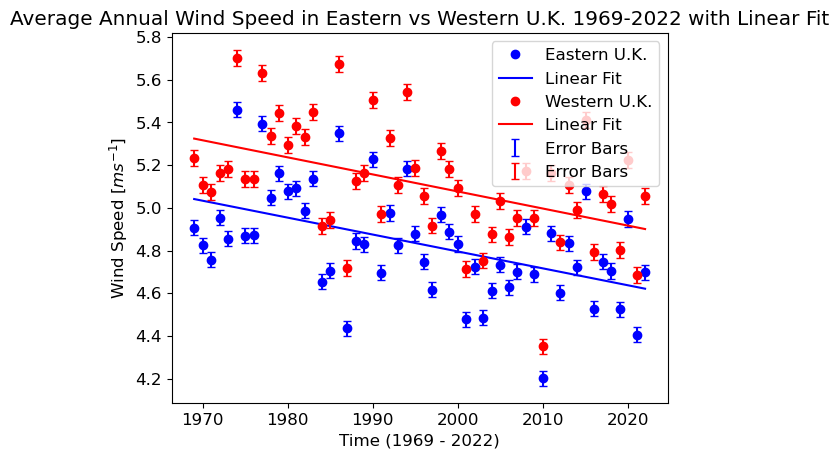

In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)
wind_array = np.array(data['sfcWind'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])

longitude_threshold = -2.0

# Find the index where longitude crosses the threshold
eastern_lon_index = np.where(lon <= longitude_threshold)[0][-1]

num_years = 648 // 12
wind_mean_eastern_uk = np.empty(num_years)

for i in range(num_years):
    start_idx = (i) * 12
    end_idx = (i + 1) * 12
    wind_year = wind_array[start_idx:end_idx, :, :eastern_lon_index + 1]
    wind_mean_eastern_uk[i] = np.nanmean(wind_year)


dividing_lon = -2.0

# Create a boolean mask for the western part of the UK
western_mask = lon <= dividing_lon

# Reshape the temperature data to have (time, lat, lon)
wind_reshaped = wind_array[:, :, :]

# Reshape the western_mask to match the dimensions of temp_reshaped
reshaped_western_mask = western_mask.reshape(1, western_mask.shape[0], western_mask.shape[1])

annual_wind_mean_west_uk = np.nanmean(wind_reshaped[:, reshaped_western_mask[0]], axis=(1,))

wind = block_reduce(annual_wind_mean_west_uk, block_size=(12), func=np.mean, cval=np.mean(annual_wind_mean_west_uk))

time = np.arange(1969, 2023)


std1 = np.nanstd(wind_mean_eastern_uk)
std_err1 = std1 / np.sqrt(len(wind_mean_eastern_uk))
cal_err1 = 0.01

err1 = np.sqrt((cal_err1**2)+(std_err1**2))
print('The total uncertainty on the eastern wind measurements is',err1)

fit_params = np.polyfit(time, wind_mean_eastern_uk, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the eastern linear fit is', fit_params[0])

linear_wind_mean_eastern_uk = fit_line(time)

std2 = np.nanstd(wind)
std_err2 = std2 / np.sqrt(len(wind))
cal_err2 = 0.01

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
print('The total uncertainty on the western wind measurements is',err2)

fit_params1 = np.polyfit(time, wind, 1)
fit_line1 = np.poly1d(fit_params1)
print('The slope of the western linear fit is', fit_params1[0])

linear_wind = fit_line1(time)

X_with_constant = sm.add_constant(time)
model_east = sm.OLS(wind_mean_eastern_uk, X_with_constant)
results_east = model_east.fit()

t_statistic_east = results_east.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_east = len(wind_mean_eastern_uk) - 2
p_value_east = 2 * (1 - stats.t.cdf(np.abs(t_statistic_east), df=degrees_of_freedom_east))

null_hypothesis_value = 0  
z_score_east = (fit_params[0] - null_hypothesis_value) / results_east.bse[1]

print("T-statistic east:", t_statistic_east)
print("Degrees of Freedom east:", degrees_of_freedom_east)
print("P-value east:", p_value_east)
print("Z_score east:", z_score_east)

X_with_constant = sm.add_constant(time)
model_west = sm.OLS(wind, X_with_constant)
results_west = model_west.fit()

t_statistic_west = results_west.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom_west = len(wind) - 2
p_value_west = 2 * (1 - stats.t.cdf(np.abs(t_statistic_west), df=degrees_of_freedom_west))

null_hypothesis_value = 0  
z_score_west = (fit_params1[0] - null_hypothesis_value) / results_west.bse[1]

print("T-statistic west:", t_statistic_west)
print("Degrees of Freedom west:", degrees_of_freedom_west)
print("P-value west:", p_value_west)
print("Z_score west:", z_score_west)


plt.plot(time, wind_mean_eastern_uk, 'bo', label='Eastern U.K.')
plt.plot(time, linear_wind_mean_eastern_uk, 'b', label='Linear Fit')
plt.errorbar(time, wind_mean_eastern_uk, yerr=err1, fmt='none', color='b', capsize=3, label='Error Bars')
plt.plot(time, wind, 'ro', label='Western U.K.')
plt.plot(time, linear_wind, 'r', label='Linear Fit')
plt.errorbar(time, wind, yerr=err2, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1969 - 2022)')
plt.ylabel('Wind Speed $[ms^{-1}]$')
plt.title('Average Annual Wind Speed in Eastern vs Western U.K. 1969-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')

## Pressure 2014

Text(0.5, 1.0, 'Sea Level Pressure U.K. 2011-2016')

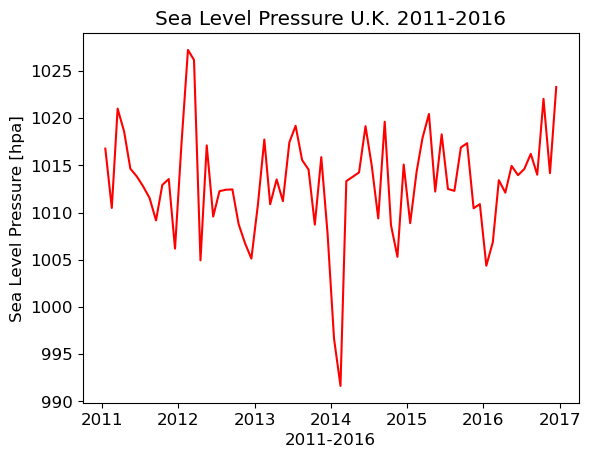

In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)

time = np.array(data['time'])

psl = np.array(data['psl'])
psl = np.nanmean(psl, axis=(1, 2))


plt.plot(time[600:672], psl[600:672], 'r')
plt.xlabel('2011-2016')
plt.ylabel('Sea Level Pressure [hpa]')
plt.rcParams.update({'font.size': 12})
plt.title('Sea Level Pressure U.K. 2011-2016')

## Normalized Linear Plots

## Temperature

### U.K. Temperature

The slope of the linear fit is 0.0031776142182233947


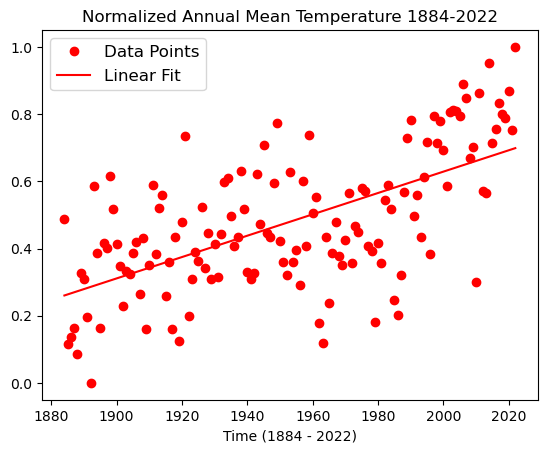

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tas'])
time = np.array(data['time'])

# Use block_reduce to average over each block of 12 months
temp_reduced = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean = np.nanmean(temp_reduced, axis=(1, 2))

time = np.arange(1884,2023)

temp_annual_mean = temp_annual_mean.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_temperature_data = scaler.fit_transform(temp_annual_mean)

#Flatten the data into 1D array for plotting
plot_data = normalized_temperature_data.flatten()

fit_params = np.polyfit(time, plot_data, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])
linear_temp = fit_line(time)

plt.plot(time, plot_data, 'ro', label='Data Points')
plt.plot(time, linear_temp, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Annual Mean Temperature 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()


### U.K Max Temperature

The slope of the linear fit is 0.002863913345139127


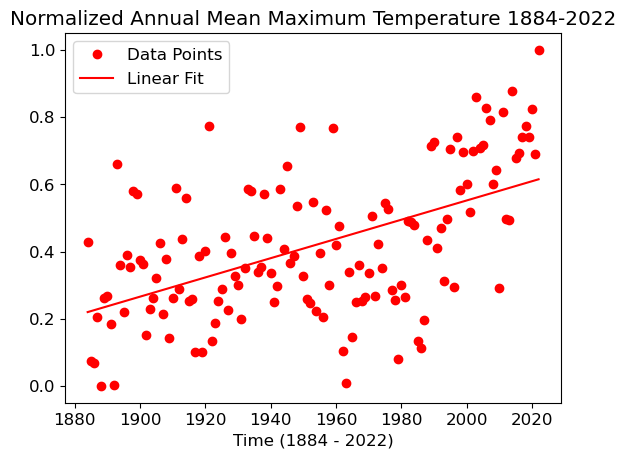

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tasmax'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

temp = np.nanmean(temp, axis=(1, 2))

temp = temp.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_temp = scaler.fit_transform(temp)

#Flatten the data into 1D array for plotting
plot_data = normalized_temp.flatten()

fit_params = np.polyfit(time, plot_data, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_temp = fit_line(time)

plt.plot(time, plot_data, 'ro', label='Data Points')
plt.plot(time, linear_temp, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Annual Mean Maximum Temperature 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

### U.K. Min Temperature

The slope of the linear fit is 0.003410313682918157


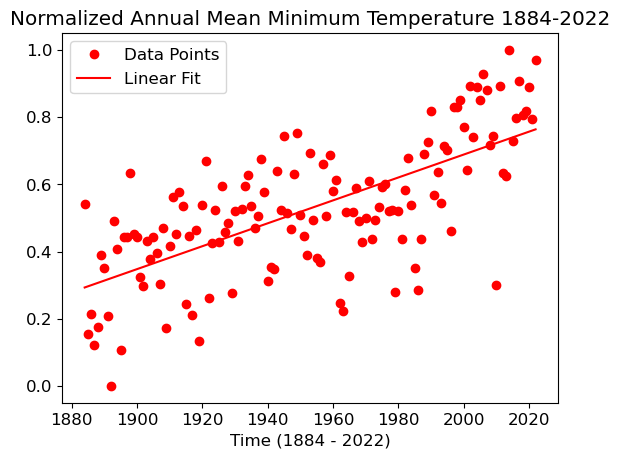

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

# Open the dataset
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tasmin'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

temp = np.nanmean(temp, axis=(1, 2))

temp = temp.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_temp = scaler.fit_transform(temp)

#Flatten the data into 1D array for plotting
plot_data = normalized_temp.flatten()

fit_params = np.polyfit(time, plot_data, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_temp = fit_line(time)

plt.plot(time, plot_data, 'ro', label='Data Points')
plt.plot(time, linear_temp, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Annual Mean Minimum Temperature 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

## Rainfall

### U.K. Rainfall

The slope of the linear fit is 0.0012948780554233382


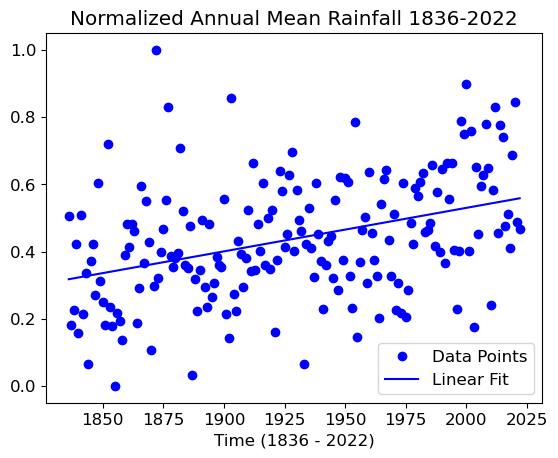

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

rain_array = np.array(data['rainfall'])
time = np.arange(1836, 2023)
rain = block_reduce(rain_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain_array))
rain = np.nanmean(rain, axis=(1, 2))

rain = rain.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_rain = scaler.fit_transform(rain)

#Flatten the data into 1D array for plotting
plot_data = normalized_rain.flatten()

fit_params = np.polyfit(time, plot_data, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])

linear_rain = fit_line(time)


plt.plot(time, plot_data, 'bo', label='Data Points')
plt.plot(time, linear_rain, 'b', label='Linear Fit')
plt.xlabel('Time (1836 - 2022)')
plt.title('Normalized Annual Mean Rainfall 1836-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

## Seasons

### Winter

The slope of the winter linear fit is 0.0010497583161659695


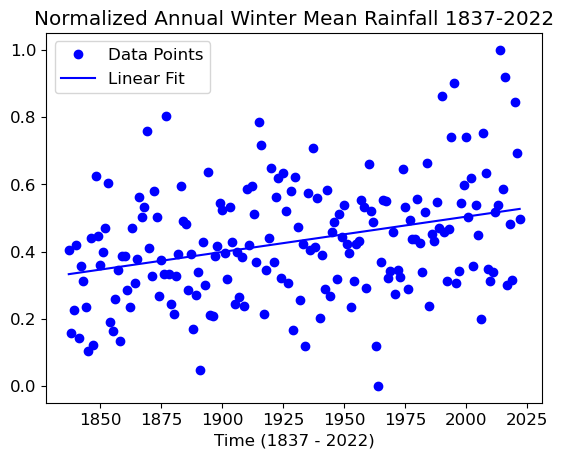

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))

winter = rain[3::4]

time = np.arange(1837,2023)

winter = winter.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_winter = scaler.fit_transform(winter)

#Flatten the data into 1D array for plotting
plot_data = normalized_winter.flatten()


fit_params_wint = np.polyfit(time, plot_data, 1)
fit_line_wint = np.poly1d(fit_params_wint)
print('The slope of the winter linear fit is', fit_params_wint[0])
linear_winter = fit_line_wint(time)


plt.plot(time, plot_data, 'bo', label='Data Points')
plt.plot(time, linear_winter, 'b', label='Linear Fit')
plt.xlabel('Time (1837 - 2022)')
plt.title('Normalized Annual Winter Mean Rainfall 1837-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()


### Spring

The slope of the spring linear fit is 0.001034252360207978


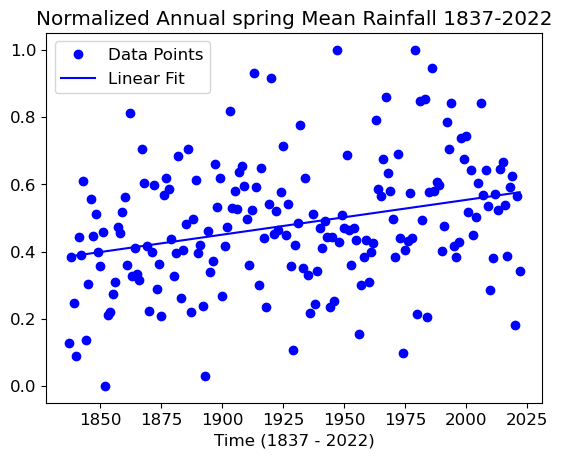

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))

spring = rain[4::4]

time = np.arange(1837,2023)

spring = spring.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_spring = scaler.fit_transform(spring)

#Flatten the data into 1D array for plotting
plot_data = normalized_spring.flatten()


fit_params_spring = np.polyfit(time, plot_data, 1)
fit_line_spring = np.poly1d(fit_params_spring)
print('The slope of the spring linear fit is', fit_params_spring[0])
linear_spring = fit_line_spring(time)


plt.plot(time, plot_data, 'bo', label='Data Points')
plt.plot(time, linear_spring, 'b', label='Linear Fit')
plt.xlabel('Time (1837 - 2022)')
plt.title('Normalized Annual spring Mean Rainfall 1837-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

### Summer

The slope of the summer linear fit is -0.00020733785617305255


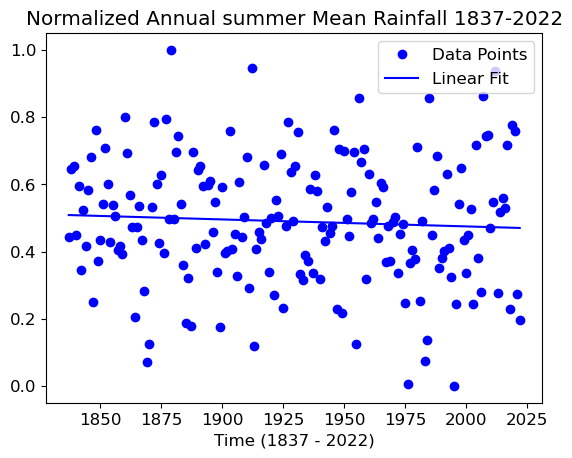

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))

summer = rain[5::4]

time = np.arange(1837,2023)

summer = summer.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_summer = scaler.fit_transform(summer)

#Flatten the data into 1D array for plotting
plot_data = normalized_summer.flatten()


fit_params_summer = np.polyfit(time, plot_data, 1)
fit_line_summer = np.poly1d(fit_params_summer)
print('The slope of the summer linear fit is', fit_params_summer[0])
linear_summer = fit_line_summer(time)


plt.plot(time, plot_data, 'bo', label='Data Points')
plt.plot(time, linear_summer, 'b', label='Linear Fit')
plt.xlabel('Time (1837 - 2022)')
plt.title('Normalized Annual summer Mean Rainfall 1837-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

### Autumn

The slope of the autumn linear fit is 0.0007698316073069824


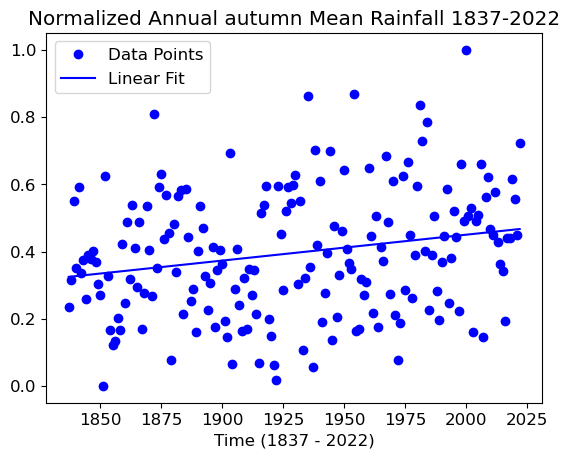

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Season_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
rain = np.nanmean(rain, axis=(1, 2))

autumn = rain[6::4]

time = np.arange(1837,2023)

autumn = autumn.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_autumn = scaler.fit_transform(autumn)

#Flatten the data into 1D array for plotting
plot_data = normalized_autumn.flatten()


fit_params_autumn = np.polyfit(time, plot_data, 1)
fit_line_autumn = np.poly1d(fit_params_autumn)
print('The slope of the autumn linear fit is', fit_params_autumn[0])
linear_autumn = fit_line_autumn(time)


plt.plot(time, plot_data, 'bo', label='Data Points')
plt.plot(time, linear_autumn, 'b', label='Linear Fit')
plt.xlabel('Time (1837 - 2022)')
plt.title('Normalized Annual autumn Mean Rainfall 1837-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

## North vs South

### Temperature

The slope of the southern linear fit is 0.0033750696257290806
The slope of the northern linear fit is 0.0031547181759640037


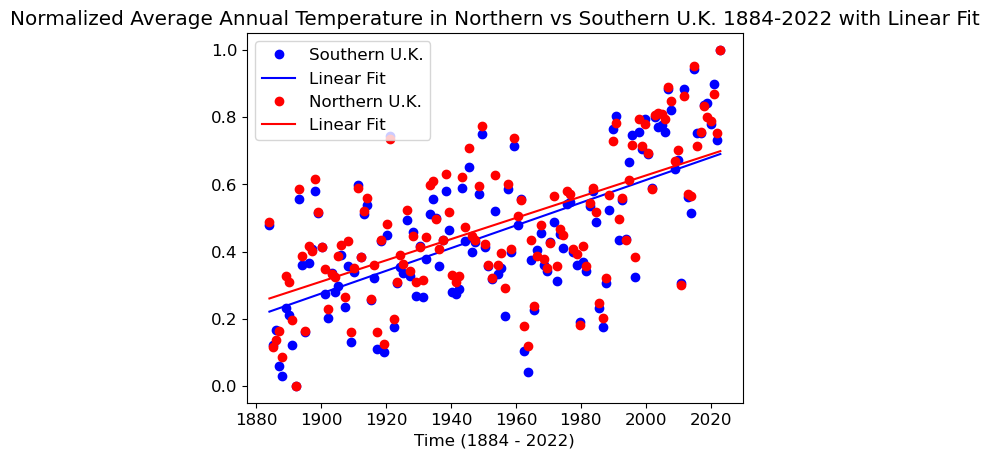

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)
    
temp_mean_south = temp_mean_south.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_south = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_south = scaler_south.fit_transform(temp_mean_south)

#Flatten the data into 1D array for plotting
plot_data_south = normalized_south.flatten()
    
temp_mean_north = temp_mean_north.reshape(-1, 1) 

# Create a MinMaxScaler object
scaler_north = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_north = scaler_south.fit_transform(temp_mean_north)

#Flatten the data into 1D array for plotting
plot_data_north = normalized_north.flatten()  
    
    
fit_params_south = np.polyfit(time, plot_data_south, 1)
fit_line_south = np.poly1d(fit_params_south)
print('The slope of the southern linear fit is', fit_params_south[0])
linear_temp_mean_south = fit_line_south(time)

fit_params_north = np.polyfit(time, plot_data_north, 1)
fit_line_north = np.poly1d(fit_params_north)
print('The slope of the northern linear fit is', fit_params_north[0])
linear_temp_mean_north = fit_line_north(time)    


plt.plot(time, plot_data_south, 'bo', label='Southern U.K.')
plt.plot(time, linear_temp_mean_south, 'b', label='Linear Fit')
plt.plot(time, plot_data_north, 'ro', label='Northern U.K.')
plt.plot(time, linear_temp_mean_north, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Average Annual Temperature in Northern vs Southern U.K. 1884-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()


### Rainfall

The slope of the southern linear fit is 0.0006272394206666305
The slope of the northern linear fit is 0.0012879535738435316


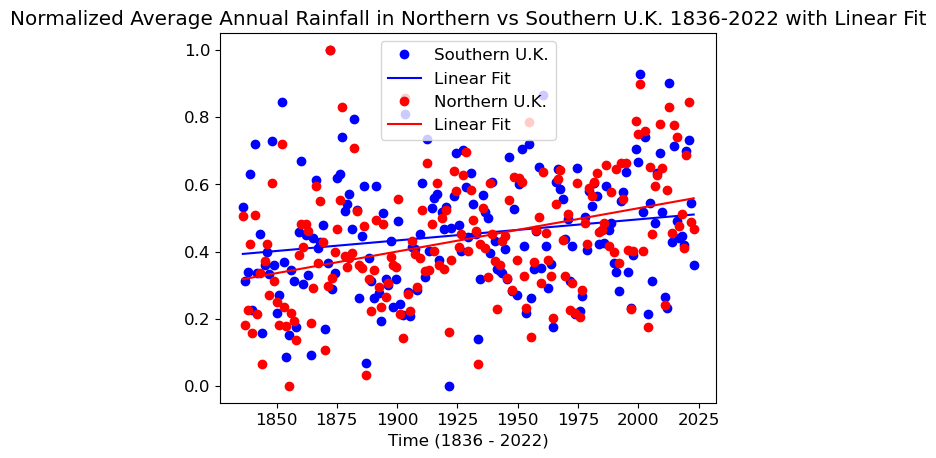

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 2244 // 12
rain_reshaped = rain[:num_years * 12].reshape(num_years, 12, -1)  

rain_mean_north = np.nanmean(rain_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1836,2023, 187)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
rain_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    rain_year = rain[start_idx:end_idx, :southern_lat_index, :]
    rain_mean_south[i] = np.nanmean(rain_year)
    
rain_mean_south = rain_mean_south.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_south = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_south = scaler_south.fit_transform(rain_mean_south)

#Flatten the data into 1D array for plotting
plot_data_south = normalized_south.flatten()
    
rain_mean_north = rain_mean_north.reshape(-1, 1) 

# Create a MinMaxScaler object
scaler_north = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_north = scaler_south.fit_transform(rain_mean_north)

#Flatten the data into 1D array for plotting
plot_data_north = normalized_north.flatten()  
    
    
fit_params_south = np.polyfit(time, plot_data_south, 1)
fit_line_south = np.poly1d(fit_params_south)
print('The slope of the southern linear fit is', fit_params_south[0])
linear_rain_mean_south = fit_line_south(time)

fit_params_north = np.polyfit(time, plot_data_north, 1)
fit_line_north = np.poly1d(fit_params_north)
print('The slope of the northern linear fit is', fit_params_north[0])
linear_rain_mean_north = fit_line_north(time)    


plt.plot(time, plot_data_south, 'bo', label='Southern U.K.')
plt.plot(time, linear_rain_mean_south, 'b', label='Linear Fit')
plt.plot(time, plot_data_north, 'ro', label='Northern U.K.')
plt.plot(time, linear_rain_mean_north, 'r', label='Linear Fit')
plt.xlabel('Time (1836 - 2022)')
plt.title('Normalized Average Annual Rainfall in Northern vs Southern U.K. 1836-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()


The slope of the southern linear fit is 0.0006272394206666305
The slope of the northern linear fit is 0.0012879535738435316


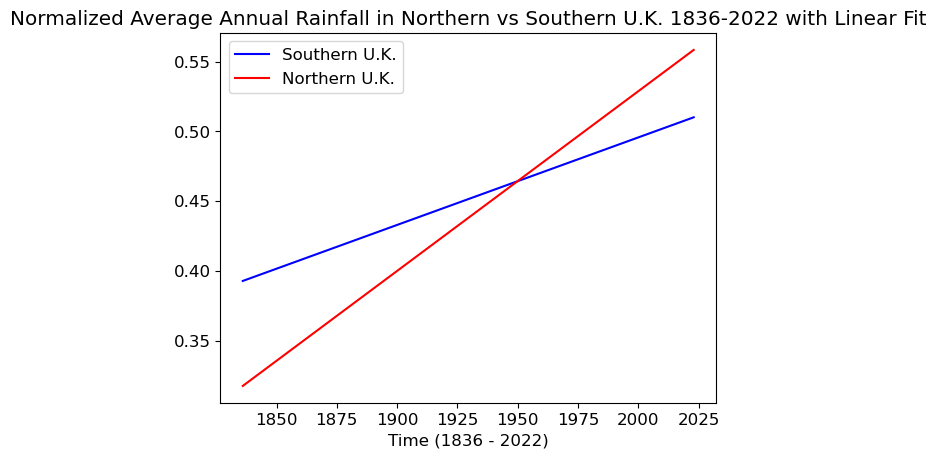

In [18]:

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

rain = np.array(data['rainfall'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 2244 // 12
rain_reshaped = rain[:num_years * 12].reshape(num_years, 12, -1)  

rain_mean_north = np.nanmean(rain_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1836,2023, 187)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
rain_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    rain_year = rain[start_idx:end_idx, :southern_lat_index, :]
    rain_mean_south[i] = np.nanmean(rain_year)
    
rain_mean_south = rain_mean_south.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_south = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_south = scaler_south.fit_transform(rain_mean_south)

#Flatten the data into 1D array for plotting
plot_data_south = normalized_south.flatten()
    
rain_mean_north = rain_mean_north.reshape(-1, 1) 

# Create a MinMaxScaler object
scaler_north = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_north = scaler_south.fit_transform(rain_mean_north)

#Flatten the data into 1D array for plotting
plot_data_north = normalized_north.flatten()  
    
    
fit_params_south = np.polyfit(time, plot_data_south, 1)
fit_line_south = np.poly1d(fit_params_south)
print('The slope of the southern linear fit is', fit_params_south[0])
linear_rain_mean_south = fit_line_south(time)

fit_params_north = np.polyfit(time, plot_data_north, 1)
fit_line_north = np.poly1d(fit_params_north)
print('The slope of the northern linear fit is', fit_params_north[0])
linear_rain_mean_north = fit_line_north(time)    



plt.plot(time, linear_rain_mean_south, 'b', label='Southern U.K.')
plt.plot(time, linear_rain_mean_north, 'r', label='Northern U.K.')
plt.xlabel('Time (1836 - 2022)')
plt.title('Normalized Average Annual Rainfall in Northern vs Southern U.K. 1836-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()


### Wind

The slope of the southern linear fit is -0.006834427938157546
The slope of the northern linear fit is -0.00673331460100378


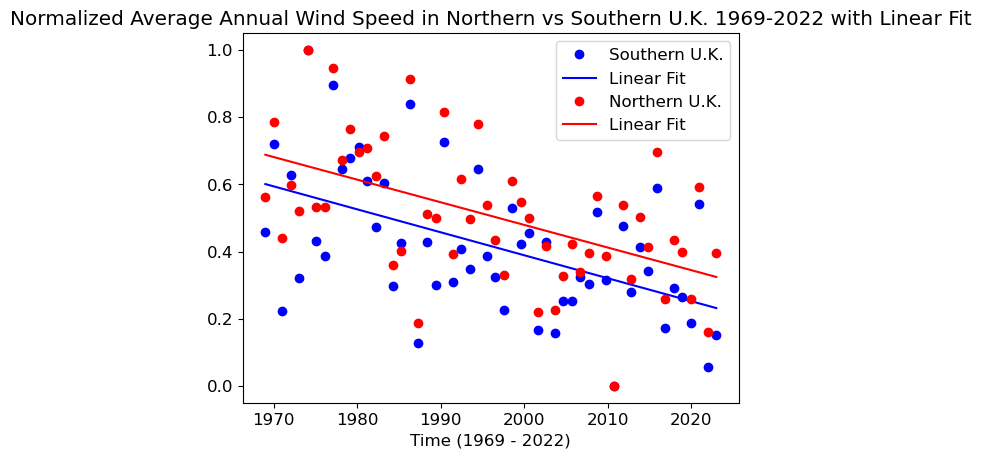

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

wind_array = np.array(data['sfcWind'])
lat = np.array(data['latitude'])


northern_lat_threshold = 54.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 648 // 12
wind_reshaped = wind_array[:num_years * 12].reshape(num_years, 12, -1)  

wind_mean_north = np.nanmean(wind_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1969,2023, 54)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 54.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
wind_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    wind_year = wind_array[start_idx:end_idx, :southern_lat_index, :]
    wind_mean_south[i] = np.nanmean(wind_year)


wind_mean_south = wind_mean_south.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_south = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_south = scaler_south.fit_transform(wind_mean_south)

#Flatten the data into 1D array for plotting
plot_data_south = normalized_south.flatten()
    
wind_mean_north = wind_mean_north.reshape(-1, 1) 

# Create a MinMaxScaler object
scaler_north = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_north = scaler_south.fit_transform(wind_mean_north)

#Flatten the data into 1D array for plotting
plot_data_north = normalized_north.flatten()  
    
    
fit_params_south = np.polyfit(time, plot_data_south, 1)
fit_line_south = np.poly1d(fit_params_south)
print('The slope of the southern linear fit is', fit_params_south[0])
linear_wind_mean_south = fit_line_south(time)

fit_params_north = np.polyfit(time, plot_data_north, 1)
fit_line_north = np.poly1d(fit_params_north)
print('The slope of the northern linear fit is', fit_params_north[0])
linear_wind_mean_north = fit_line_north(time)    


plt.plot(time, plot_data_south, 'bo', label='Southern U.K.')
plt.plot(time, linear_wind_mean_south, 'b', label='Linear Fit')
plt.plot(time, plot_data_north, 'ro', label='Northern U.K.')
plt.plot(time, linear_wind_mean_north, 'r', label='Linear Fit')
plt.xlabel('Time (1969 - 2022)')
plt.title('Normalized Average Annual Wind Speed in Northern vs Southern U.K. 1969-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')


## East vs West

### Temperature

The slope of the eastern linear fit is 0.0031753601435965183
The slope of the western linear fit is 0.0030289532772513473


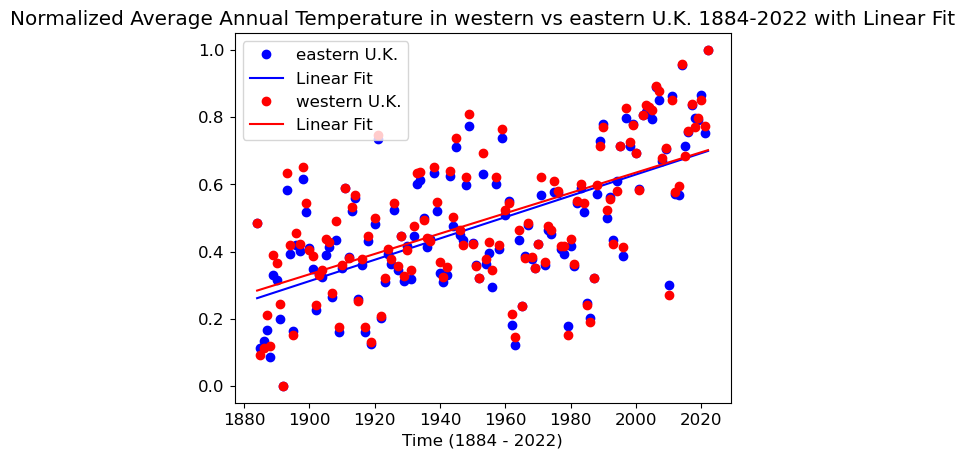

In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

# Load your data as you did before
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\25km_Month_Temp\*.nc", parallel=True)
tas_array = np.array(data['tas'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])

longitude_threshold = -2.0

# Find the index where longitude crosses the threshold
eastern_lon_index = np.where(lon <= longitude_threshold)[0][-1]

# Calculate the mean temperature for each year in the eastern U.K.
num_years = 1668 // 12
temp_mean_eastern_uk = np.empty(num_years)

for i in range(num_years):
    start_idx = (i) * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :, :eastern_lon_index + 1]
    temp_mean_eastern_uk[i] = np.nanmean(temp_year)


dividing_lon = -2.0

# Create a boolean mask for the western part of the UK
western_mask = lon <= dividing_lon

# Reshape the temperature data to have (time, lat, lon)
temp_reshaped = tas_array[:, :, :]

# Reshape the western_mask to match the dimensions of temp_reshaped
reshaped_western_mask = western_mask.reshape(1, western_mask.shape[0], western_mask.shape[1])

# Calculate the annual average temperature for the western UK
annual_temp_mean_west_uk = np.nanmean(temp_reshaped[:, reshaped_western_mask[0]], axis=(1,))

temp = block_reduce(annual_temp_mean_west_uk, block_size=(12), func=np.mean, cval=np.mean(annual_temp_mean_west_uk))

# Create an array for the years
time = np.arange(1884, 2023)

temp_mean_eastern_uk = temp_mean_eastern_uk.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_east = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_east = scaler_east.fit_transform(temp_mean_eastern_uk)

#Flatten the data into 1D array for plotting
plot_data_east = normalized_east.flatten()
    
temp = temp.reshape(-1, 1) 

# Create a MinMaxScaler object
scaler_west = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_west = scaler_east.fit_transform(temp)

#Flatten the data into 1D array for plotting
plot_data_west = normalized_west.flatten()  
    
    
fit_params_east = np.polyfit(time, plot_data_east, 1)
fit_line_east = np.poly1d(fit_params_east)
print('The slope of the eastern linear fit is', fit_params_east[0])
linear_temp_mean_eastern_uk = fit_line_east(time)

fit_params_west = np.polyfit(time, plot_data_west, 1)
fit_line_west = np.poly1d(fit_params_west)
print('The slope of the western linear fit is', fit_params_west[0])
linear_temp = fit_line_west(time)    


plt.plot(time, plot_data_east, 'bo', label='eastern U.K.')
plt.plot(time, linear_temp_mean_eastern_uk, 'b', label='Linear Fit')
plt.plot(time, plot_data_west, 'ro', label='western U.K.')
plt.plot(time, linear_temp, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Average Annual Temperature in western vs eastern U.K. 1884-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()

### Rainfall

The slope of the eastern linear fit is 0.0012948780554233373
The slope of the western linear fit is 0.0014849005842886612


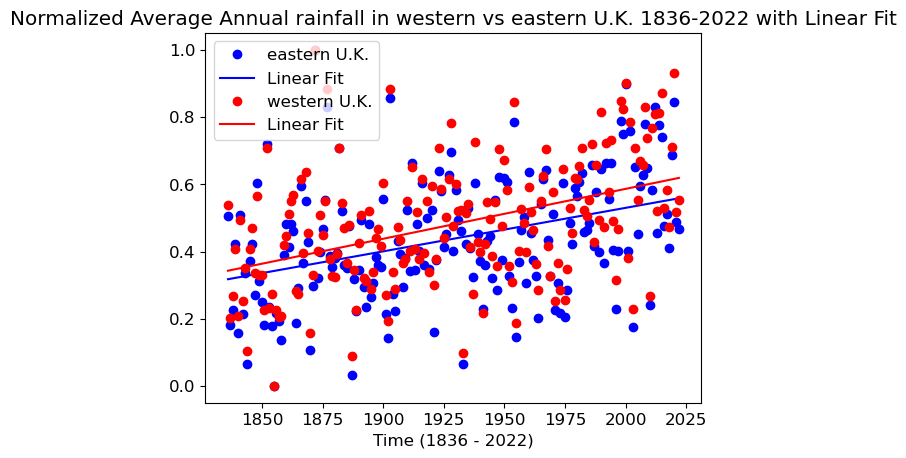

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
rain_array = np.array(data['rainfall'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])

longitude_threshold = -2.0

# Find the index where longitude crosses the threshold
eastern_lon_index = np.where(lon <= longitude_threshold)[0][-1]

num_years = 2244 // 12
rain_mean_eastern_uk = np.empty(num_years)

for i in range(num_years):
    start_idx = (i) * 12
    end_idx = (i + 1) * 12
    rain_year = rain_array[start_idx:end_idx, :, :eastern_lon_index + 1]
    rain_mean_eastern_uk[i] = np.nanmean(rain_year)


dividing_lon = -2.0

# Create a boolean mask for the western part of the UK
western_mask = lon <= dividing_lon

# Reshape the rainerature data to have (time, lat, lon)
rain_reshaped = rain_array[:, :, :]

# Reshape the western_mask to match the dimensions of rain_reshaped
reshaped_western_mask = western_mask.reshape(1, western_mask.shape[0], western_mask.shape[1])

# Calculate the annual average rainerature for the western UK
annual_rain_mean_west_uk = np.nanmean(rain_reshaped[:, reshaped_western_mask[0]], axis=(1,))

rain = block_reduce(annual_rain_mean_west_uk, block_size=(12), func=np.mean, cval=np.mean(annual_rain_mean_west_uk))

# Create an array for the years
time = np.arange(1836, 2023)

rain_mean_eastern_uk = rain_mean_eastern_uk.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_east = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_east = scaler_east.fit_transform(rain_mean_eastern_uk)

#Flatten the data into 1D array for plotting
plot_data_east = normalized_east.flatten()
    
rain = rain.reshape(-1, 1) 

# Create a MinMaxScaler object
scaler_west = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_west = scaler_east.fit_transform(rain)

#Flatten the data into 1D array for plotting
plot_data_west = normalized_west.flatten()  
    
    
fit_params_east = np.polyfit(time, plot_data_east, 1)
fit_line_east = np.poly1d(fit_params_east)
print('The slope of the eastern linear fit is', fit_params_east[0])
linear_rain_mean_eastern_uk = fit_line_east(time)

fit_params_west = np.polyfit(time, plot_data_west, 1)
fit_line_west = np.poly1d(fit_params_west)
print('The slope of the western linear fit is', fit_params_west[0])
linear_rain = fit_line_west(time)    


plt.plot(time, plot_data_east, 'bo', label='eastern U.K.')
plt.plot(time, linear_rain_mean_eastern_uk, 'b', label='Linear Fit')
plt.plot(time, plot_data_west, 'ro', label='western U.K.')
plt.plot(time, linear_rain, 'r', label='Linear Fit')
plt.xlabel('Time (1836 - 2022)')
plt.title('Normalized Average Annual rainfall in western vs eastern U.K. 1836-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()

### Wind

The slope of the eastern linear fit is -0.00686035827272082
The slope of the western linear fit is -0.006474356710518461


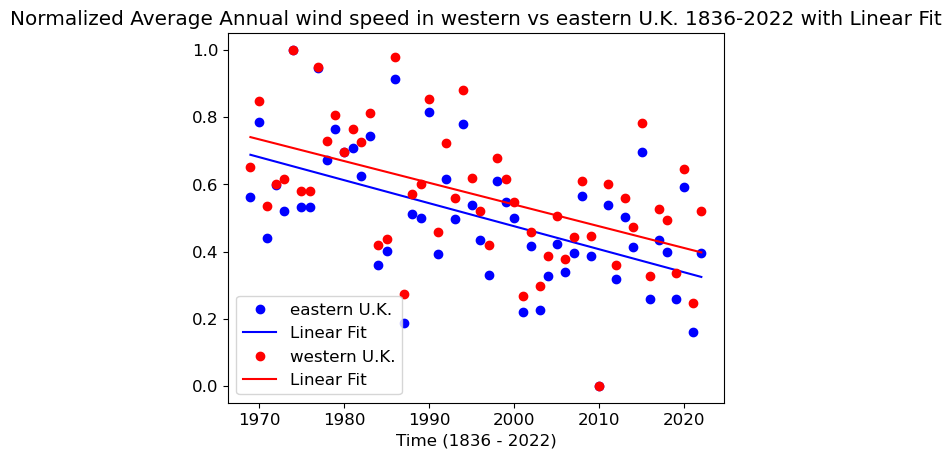

In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)
wind_array = np.array(data['sfcWind'])
time = np.array(data['time'])
lon = np.array(data['longitude'])
lat = np.array(data['latitude'])

longitude_threshold = -2.0

# Find the index where longitude crosses the threshold
eastern_lon_index = np.where(lon <= longitude_threshold)[0][-1]

num_years = 648 // 12
wind_mean_eastern_uk = np.empty(num_years)

for i in range(num_years):
    start_idx = (i) * 12
    end_idx = (i + 1) * 12
    wind_year = wind_array[start_idx:end_idx, :, :eastern_lon_index + 1]
    wind_mean_eastern_uk[i] = np.nanmean(wind_year)


dividing_lon = -2.0

# Create a boolean mask for the western part of the UK
western_mask = lon <= dividing_lon

# Reshape the temperature data to have (time, lat, lon)
wind_reshaped = wind_array[:, :, :]

# Reshape the western_mask to match the dimensions of temp_reshaped
reshaped_western_mask = western_mask.reshape(1, western_mask.shape[0], western_mask.shape[1])

annual_wind_mean_west_uk = np.nanmean(wind_reshaped[:, reshaped_western_mask[0]], axis=(1,))

wind = block_reduce(annual_wind_mean_west_uk, block_size=(12), func=np.mean, cval=np.mean(annual_wind_mean_west_uk))

time = np.arange(1969, 2023)

wind_mean_eastern_uk = wind_mean_eastern_uk.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_east = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_east = scaler_east.fit_transform(wind_mean_eastern_uk)

#Flatten the data into 1D array for plotting
plot_data_east = normalized_east.flatten()
    
wind = wind.reshape(-1, 1) 

# Create a MinMaxScaler object
scaler_west = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_west = scaler_east.fit_transform(wind)

#Flatten the data into 1D array for plotting
plot_data_west = normalized_west.flatten()  
    
    
fit_params_east = np.polyfit(time, plot_data_east, 1)
fit_line_east = np.poly1d(fit_params_east)
print('The slope of the eastern linear fit is', fit_params_east[0])
linear_wind_mean_eastern_uk = fit_line_east(time)

fit_params_west = np.polyfit(time, plot_data_west, 1)
fit_line_west = np.poly1d(fit_params_west)
print('The slope of the western linear fit is', fit_params_west[0])
linear_wind = fit_line_west(time)    


plt.plot(time, plot_data_east, 'bo', label='eastern U.K.')
plt.plot(time, linear_wind_mean_eastern_uk, 'b', label='Linear Fit')
plt.plot(time, plot_data_west, 'ro', label='western U.K.')
plt.plot(time, linear_wind, 'r', label='Linear Fit')
plt.xlabel('Time (1836 - 2022)')
plt.title('Normalized Average Annual wind speed in western vs eastern U.K. 1836-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()

## Northern Scotland

### Temperature

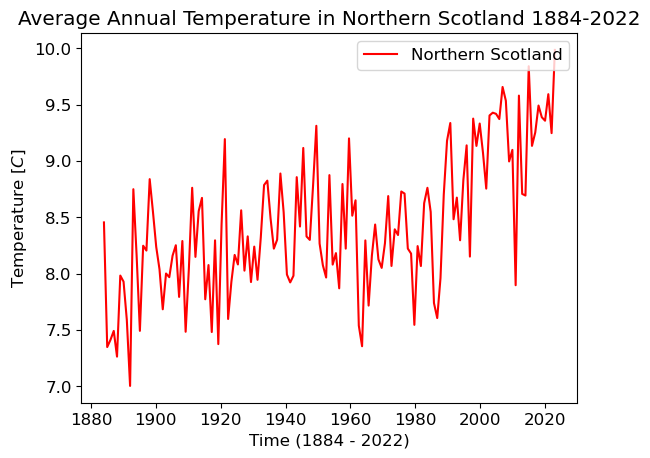

In [24]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])


northern_lat_threshold = 57.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

std2 = np.nanstd(temp_mean_north)
std_err2 = std2 / np.sqrt(len(temp_mean_north))
cal_err2 = 0.01

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
#print('The total uncertainty on the northern temperature measurements is',err2)

fit_params1 = np.polyfit(time, temp_mean_north, 1)
fit_line1 = np.poly1d(fit_params1)
#print('The slope of the northern linear fit is', fit_params1[0])

linear_temp_mean_north = fit_line1(time)

plt.plot(time, temp_mean_north, 'r', label='Northern Scotland')
#plt.plot(time, linear_temp_mean_north, 'r', label='Linear Fit')
#plt.errorbar(time, temp_mean_north, yerr=err2, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature in Northern Scotland 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')

### Temperature with Linear Fit

The total uncertainty on the northern temperature measurements is 0.052831949890179614
The slope of the northern linear fit is 0.009406566828997544


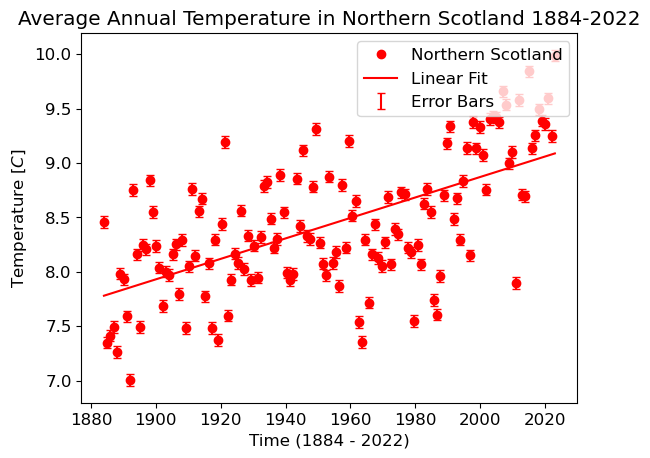

In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])


northern_lat_threshold = 57.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

std2 = np.nanstd(temp_mean_north)
std_err2 = std2 / np.sqrt(len(temp_mean_north))
cal_err2 = 0.01

err2 = np.sqrt((cal_err2**2)+(std_err2**2))
print('The total uncertainty on the northern temperature measurements is',err2)

fit_params1 = np.polyfit(time, temp_mean_north, 1)
fit_line1 = np.poly1d(fit_params1)
print('The slope of the northern linear fit is', fit_params1[0])

linear_temp_mean_north = fit_line1(time)

plt.plot(time, temp_mean_north, 'ro', label='Northern Scotland')
plt.plot(time, linear_temp_mean_north, 'r', label='Linear Fit')
plt.errorbar(time, temp_mean_north, yerr=err2, fmt='none', color='r', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature $[C]$')
plt.title('Average Annual Temperature in Northern Scotland 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')


### Normalized Temperature with Linear Fit

The slope of the linear fit is 0.003152160862152643


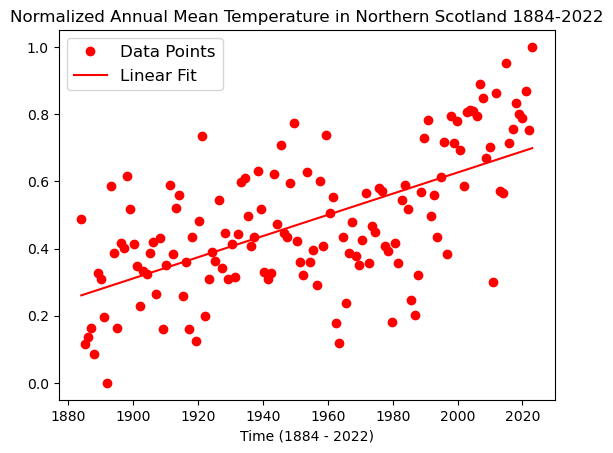

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])


northern_lat_threshold = 57.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

temp_mean_north = temp_mean_north.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_temperature_data = scaler.fit_transform(temp_mean_north)

#Flatten the data into 1D array for plotting
plot_data = normalized_temperature_data.flatten()

fit_params = np.polyfit(time, plot_data, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the linear fit is', fit_params[0])
linear_temp = fit_line(time)

plt.plot(time, plot_data, 'ro', label='Data Points')
plt.plot(time, linear_temp, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Annual Mean Temperature in Northern Scotland 1884-2022')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

### Northern Scotland vs Rest of U.K.

The slope of the rest of U.K. linear fit is 0.0031498906464579807
The slope of the Northern Scotland linear fit is 0.0030659100293306154


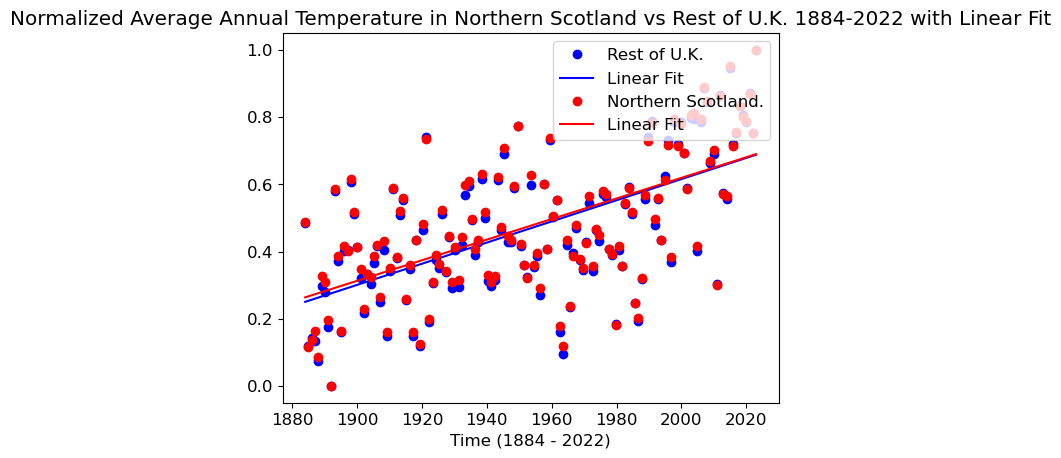

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])


northern_lat_threshold = 57.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

time = np.linspace(1884,2023, 139)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 57.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]

# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)
    
temp_mean_south = temp_mean_south.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_south = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_south = scaler_south.fit_transform(temp_mean_south)

#Flatten the data into 1D array for plotting
plot_data_south = normalized_south.flatten()

temp_mean_north = temp_mean_north.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_temperature_data = scaler.fit_transform(temp_mean_north)

#Flatten the data into 1D array for plotting
plot_data_north = normalized_temperature_data.flatten()

fit_params_south = np.polyfit(time, plot_data_south, 1)
fit_line_south = np.poly1d(fit_params_south)
print('The slope of the rest of U.K. linear fit is', fit_params_south[0])
linear_temp_mean_south = fit_line_south(time)

fit_params_north = np.polyfit(time, plot_data_north, 1)
fit_line_north = np.poly1d(fit_params_north)
print('The slope of the Northern Scotland linear fit is', fit_params_north[0])
linear_temp_mean_north = fit_line_north(time)

plt.plot(time, plot_data_south, 'bo', label='Rest of U.K.')
plt.plot(time, linear_temp_mean_south, 'b', label='Linear Fit')
plt.plot(time, plot_data_north, 'ro', label='Northern Scotland.')
plt.plot(time, linear_temp_mean_north, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Average Annual Temperature in Northern Scotland vs Rest of U.K. 1884-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend(loc='upper right')

## Cornwall

### Average Annual Temperature

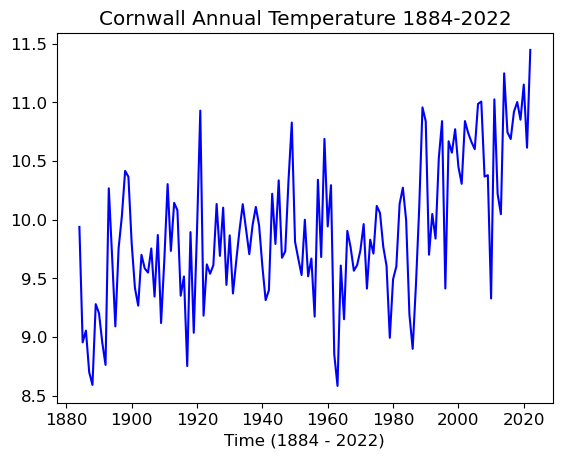

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])
lon = np.array(data['longitude'])
time = np.arange(1884,2023)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 51.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]
num_years = 1668 // 12
# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)

plt.plot(time, temp_mean_south, 'b')
plt.xlabel('Time (1884 - 2022)')
plt.title('Cornwall Annual Temperature 1884-2022')
plt.rcParams.update({'font.size': 12})

### Annual Temperature with Linear Fit

The total uncertainty on the southern temperature measurements is 0.05269514279164722
The slope of the southern linear fit is 0.008562112639862406


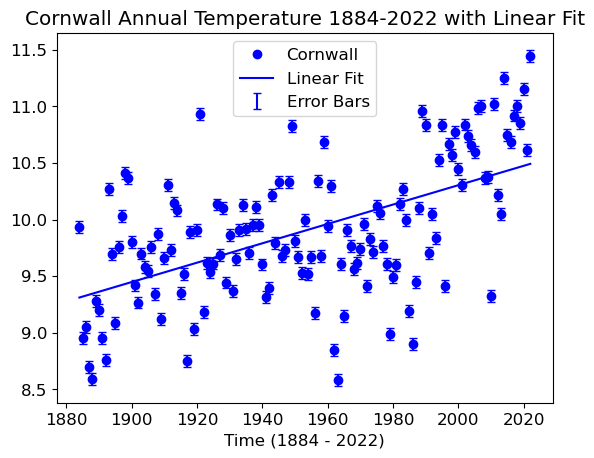

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])
lon = np.array(data['longitude'])
time = np.arange(1884,2023)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 51.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]
num_years = 1668 // 12
# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)

std1 = np.nanstd(temp_mean_south)
std_err1 = std1 / np.sqrt(len(temp_mean_south))
cal_err1 = 0.01

err1 = np.sqrt((cal_err1**2)+(std_err1**2))
print('The total uncertainty on the southern temperature measurements is',err1)

fit_params = np.polyfit(time, temp_mean_south, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the southern linear fit is', fit_params[0])

linear_temp_mean_south = fit_line(time)

plt.plot(time, temp_mean_south, 'bo', label='Cornwall')
plt.plot(time, linear_temp_mean_south, 'b', label='Linear Fit')
plt.errorbar(time, temp_mean_south, yerr=err1, fmt='none', color='b', capsize=3, label='Error Bars')
plt.xlabel('Time (1884 - 2022)')
plt.title('Cornwall Annual Temperature 1884-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()

### Normalized Average Temperature with Linear Fit

The slope of the southern linear fit is 0.0029891976522585166


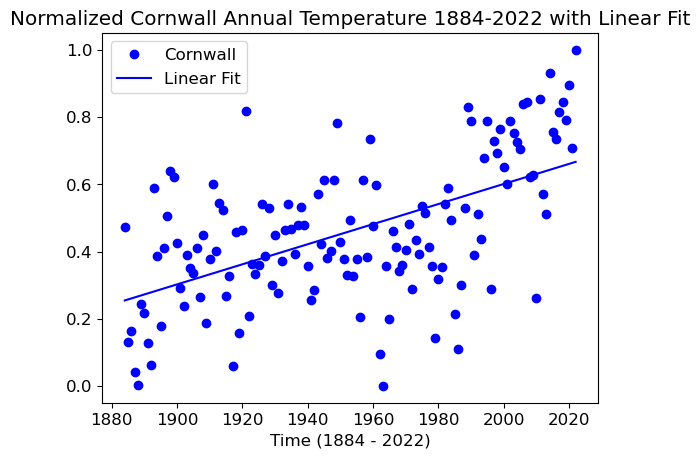

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])
lon = np.array(data['longitude'])
time = np.arange(1884,2023)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 51.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]
num_years = 1668 // 12
# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)

temp_mean_south = temp_mean_south.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_south = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_south = scaler_south.fit_transform(temp_mean_south)

#Flatten the data into 1D array for plotting
plot_data_south = normalized_south.flatten()

std1 = np.nanstd(temp_mean_south)
std_err1 = std1 / np.sqrt(len(temp_mean_south))
cal_err1 = 0.01

err1 = np.sqrt((cal_err1**2)+(std_err1**2))


fit_params = np.polyfit(time, plot_data_south, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the southern linear fit is', fit_params[0])

linear_temp_mean_south = fit_line(time)

plt.plot(time, plot_data_south, 'bo', label='Cornwall')
plt.plot(time, linear_temp_mean_south, 'b', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Cornwall Annual Temperature 1884-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()

The slope of the Cornwall linear fit is 0.0029891976522585166
The slope of the rest of U.K. linear fit is 0.0031775784526014003


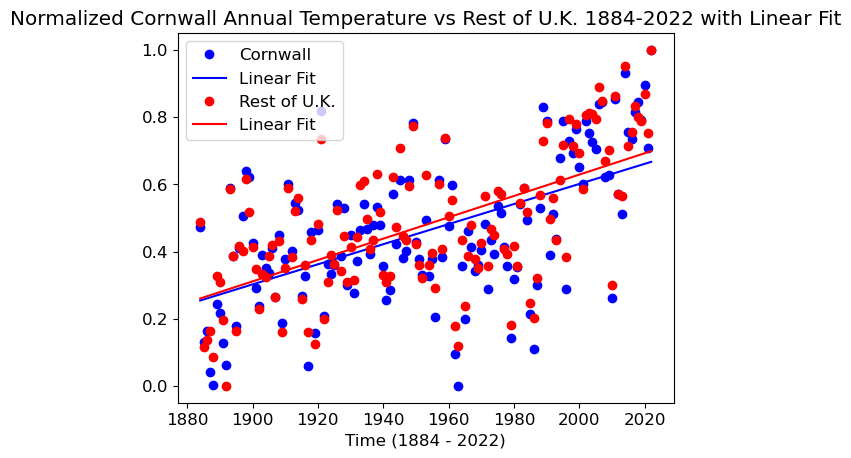

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
lat = np.array(data['latitude'])
lon = np.array(data['longitude'])
time = np.arange(1884,2023)

# Define the latitude threshold for southern U.K.
southern_lat_threshold = 51.0

# Find the index where latitude crosses the threshold
southern_lat_index = np.where(lat >= southern_lat_threshold)[0][0]
num_years = 1668 // 12
# Calculate the mean temperature for each year in the southern U.K.
temp_mean_south = np.empty(num_years)
for i in range(num_years):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    temp_year = tas_array[start_idx:end_idx, :southern_lat_index, :]
    temp_mean_south[i] = np.nanmean(temp_year)

temp_mean_south = temp_mean_south.reshape(-1, 1)    
    
# Create a MinMaxScaler object
scaler_south = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_south = scaler_south.fit_transform(temp_mean_south)

#Flatten the data into 1D array for plotting
plot_data_south = normalized_south.flatten()


fit_params = np.polyfit(time, plot_data_south, 1)
fit_line = np.poly1d(fit_params)
print('The slope of the Cornwall linear fit is', fit_params[0])
linear_temp_mean_south = fit_line(time)

northern_lat_threshold = 51.0
northern_lat_index = np.where(lat >= northern_lat_threshold)[0][0]

num_years = 1668 // 12
temp_reshaped = tas_array[:num_years * 12].reshape(num_years, 12, -1)  

temp_mean_north = np.nanmean(temp_reshaped[:, :, northern_lat_index:], axis=(1, 2))

temp_mean_north = temp_mean_north.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_temperature_data = scaler.fit_transform(temp_mean_north)

#Flatten the data into 1D array for plotting
plot_data_north = normalized_temperature_data.flatten()
fit_params_north = np.polyfit(time, plot_data_north, 1)
fit_line_north = np.poly1d(fit_params_north)
print('The slope of the rest of U.K. linear fit is', fit_params_north[0])
linear_temp_mean_north = fit_line_north(time)


plt.plot(time, plot_data_south, 'bo', label='Cornwall')
plt.plot(time, linear_temp_mean_south, 'b', label='Linear Fit')
plt.plot(time, plot_data_north, 'ro', label='Rest of U.K.')
plt.plot(time, linear_temp_mean_north, 'r', label='Linear Fit')
plt.xlabel('Time (1884 - 2022)')
plt.title('Normalized Cornwall Annual Temperature vs Rest of U.K. 1884-2022 with Linear Fit')
plt.rcParams.update({'font.size': 12})
plt.legend()